#Data Cleaning

In [1]:
import pandas as pd
import numpy as np


In [23]:
income_data=pd.read_csv(r'D:\train.csv')

In [24]:
income_data.shape

(199523, 41)

In [25]:
income_data.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


In [26]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 41 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   age                               199523 non-null  int64 
 1   class_of_worker                   199523 non-null  object
 2   industry_code                     199523 non-null  int64 
 3   occupation_code                   199523 non-null  int64 
 4   education                         199523 non-null  object
 5   wage_per_hour                     199523 non-null  int64 
 6   enrolled_in_edu_inst_lastwk       199523 non-null  object
 7   marital_status                    199523 non-null  object
 8   major_industry_code               199523 non-null  object
 9   major_occupation_code             199523 non-null  object
 10  race                              199523 non-null  object
 11  hispanic_origin                   198649 non-null  object
 12  se

In [271]:
income_data.describe()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_level
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1.956180,0.175438,1.514833,23.174897,94.499672,-43794.199165
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,2.365126,0.553694,0.851473,24.411488,0.500001,24126.148404
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,-50000.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000,-50000.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000,94.000000,-50000.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000,-50000.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000,50000.000000


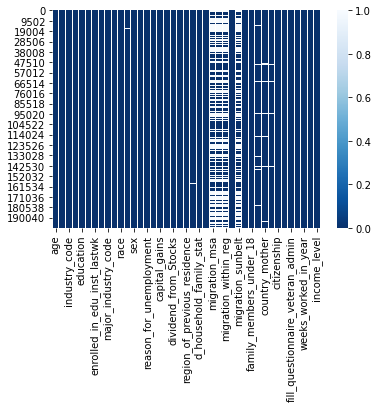

In [144]:
plt.figsize=(26,16)
sns.heatmap(income_data.isnull(),cmap='Blues_r')
plt.show()

# Imputing missing values with mode value
# All missing values are categoricals values

In [33]:
income_data_missing_value=income_data.columns[income_data.isnull().any()].tolist()

In [36]:
income_data_missing_value_df=income_data[income_data_missing_value]

In [37]:
income_data_missing_value_df.describe()

,hispanic_origin,state_of_previous_residence,migration_msa,migration_reg,migration_within_reg,migration_sunbelt,country_father,country_mother,country_self
count,198649,198815,99827,99827,99827,99827,192810,193404,196130
unique,9,50,9,8,9,3,42,42,42
top,All other,Not in universe,Nonmover,Nonmover,Nonmover,Not in universe,United-States,United-States,United-States
freq,171907,183750,82538,82538,82538,84054,159163,160479,176989


In [38]:
income_data_missing_value

['hispanic_origin',
 'state_of_previous_residence',
 'migration_msa',
 'migration_reg',
 'migration_within_reg',
 'migration_sunbelt',
 'country_father',
 'country_mother',
 'country_self']

In [41]:
income_data_missing_value_df['hispanic_origin'].value_counts()

All other                    171907
Mexican-American               8079
Mexican (Mexicano)             7234
Central or South American      3895
Puerto Rican                   3313
Other Spanish                  2485
Cuban                          1126
Do not know                     306
Chicano                         304
Name: hispanic_origin, dtype: int64

In [42]:
income_data_missing_value_df['hispanic_origin'].mode()

0    All other
dtype: object

In [46]:
for i in income_data_missing_value_df.columns:
    print(income_data_missing_value_df[i].mode())

0    All other
dtype: object
0    Not in universe
dtype: object
0    Nonmover
dtype: object
0    Nonmover
dtype: object
0    Nonmover
dtype: object
0    Not in universe
dtype: object
0    United-States
dtype: object
0    United-States
dtype: object
0    United-States
dtype: object


Imputing missing value with mode value because the missing values categorical features

In [50]:
income_data_missing_value_df_impute=pd.DataFrame()
for i in income_data_missing_value_df.columns:
    income_data_missing_value_df_impute[i]=income_data_missing_value_df[i].fillna(income_data_missing_value_df[i].mode())
    

In [52]:
income_data_missing_value_df_impute.isnull().sum()

hispanic_origin                0
state_of_previous_residence    0
migration_msa                  0
migration_reg                  0
migration_within_reg           0
migration_sunbelt              0
country_father                 0
country_mother                 0
country_self                   0
dtype: int64

In [53]:
income_data_missing_value_df_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   hispanic_origin              199523 non-null  object
 1   state_of_previous_residence  199523 non-null  object
 2   migration_msa                199523 non-null  object
 3   migration_reg                199523 non-null  object
 4   migration_within_reg         199523 non-null  object
 5   migration_sunbelt            199523 non-null  object
 6   country_father               199523 non-null  object
 7   country_mother               199523 non-null  object
 8   country_self                 199523 non-null  object
dtypes: object(9)
memory usage: 13.7+ MB


#Dropping the missing values in original datarame and appending the new imputed dataframe

In [60]:
df_no_missing_values=income_data.drop(income_data_missing_value,axis=1)

In [64]:
df_income_level_no_missingvalues=pd.concat([df_no_missing_values,income_data_missing_value_df_impute],axis=1)

In [65]:
df_income_level_no_missingvalues.shape

(199523, 41)

In [66]:
df_income_level_no_missingvalues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 41 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   age                               199523 non-null  int64 
 1   class_of_worker                   199523 non-null  object
 2   industry_code                     199523 non-null  int64 
 3   occupation_code                   199523 non-null  int64 
 4   education                         199523 non-null  object
 5   wage_per_hour                     199523 non-null  int64 
 6   enrolled_in_edu_inst_lastwk       199523 non-null  object
 7   marital_status                    199523 non-null  object
 8   major_industry_code               199523 non-null  object
 9   major_occupation_code             199523 non-null  object
 10  race                              199523 non-null  object
 11  sex                               199523 non-null  object
 12  me

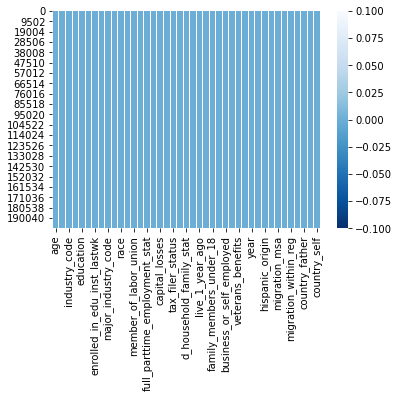

In [145]:
sns.heatmap(df_income_level_no_missingvalues.isnull(),cmap='Blues_r')

#  Checking for outliers

In [75]:
num_df= df_income_level_no_missingvalues.select_dtypes(include=['int64'])

In [76]:
num_df.head()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,0,0,0,0,0,0,0,0,2,0,95,-50000
1,58,4,34,0,0,0,0,1,0,2,52,94,-50000
2,18,0,0,0,0,0,0,0,0,2,0,95,-50000
3,9,0,0,0,0,0,0,0,0,0,0,94,-50000
4,10,0,0,0,0,0,0,0,0,0,0,94,-50000


In [123]:
num_df.shape

(199523, 13)

#technique 1

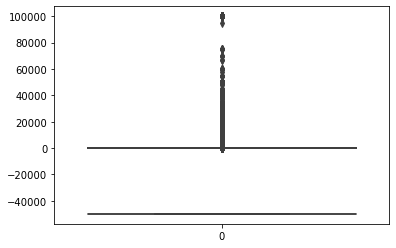

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in num_df.columns:
    sns.boxplot(data=num_df[i])

In [79]:
#Technique 2

In [78]:
from sklearn.cluster import DBSCAN

outlier_detection = DBSCAN(min_samples=2,eps=3)
clusters=outlier_detection.fit_predict(num_df)
list(clusters).count(-1)

34336

In [81]:
from sklearn.ensemble import IsolationForest

clf=IsolationForest(behaviour = 'new', max_samples=100, random_state = 1, contamination= 'auto')
pred=clf.fit_predict(num_df)
pred

C:\Users\mural\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:252: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  warn(


array([1, 1, 1, ..., 1, 1, 1])

In [87]:
x=0
for i in pred:
    if i == -1:
        x+=1

print(x)        
        

40476


In isolationforest if the output is 1 that means no outlier 
But if the output is -1 then having a outliers
Here total outliers present in our dataset are nearly about 40k

In [85]:
40476+159047

199523

In [86]:
num_df.shape

(199523, 13)

In [95]:
for i in num_df.columns:
    percent=np.percentile(num_df[i],[95,96,97,98,99,100])
    print("{},{}" .format(i,percent))

age,[75. 77. 79. 81. 85. 90.]
industry_code,[44. 45. 45. 47. 49. 51.]
occupation_code,[38. 39. 41. 42. 43. 46.]
wage_per_hour,[ 495.  600.  800. 1000. 1400. 9999.]
capital_gains,[    0.     0.  2463.  4931.  8614. 99999.]
capital_losses,[   0.    0.    0.    0. 1887. 4608.]
dividend_from_Stocks,[  400.   600.  1000.  2000.  4550. 99999.]
num_person_Worked_employer,[6. 6. 6. 6. 6. 6.]
business_or_self_employed,[2. 2. 2. 2. 2. 2.]
veterans_benefits,[2. 2. 2. 2. 2. 2.]
weeks_worked_in_year,[52. 52. 52. 52. 52. 52.]
year,[95. 95. 95. 95. 95. 95.]
income_level,[50000. 50000. 50000. 50000. 50000. 50000.]


#Outer_list values are having outliers values
#Replacing these values with the 99th percentile

In [100]:
outlier_list=['wage_per_hour','capital_gains','capital_losses','dividend_from_Stocks']


In [101]:
removed_outliers_df=pd.DataFrame()
for i in outlier_list:
    removed_outliers_df[i]=np.where(num_df[i]> np.percentile(num_df[i],99),np.percentile(num_df[i],99),num_df[i])
    



# df_income["wage_per_hour"] =         np.where(df_income["wage_per_hour"] > np.percentile(df_income['wage_per_hour'],99), np.percentile(df_income['wage_per_hour'],99),df_income['wage_per_hour


In [102]:
removed_outliers_df.describe()

,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks
count,199523.000000,199523.000000,199523.000000,199523.000000
mean,49.558271,202.261208,34.344762,110.301770
std,218.197568,1158.073097,245.652282,569.037893
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1400.000000,8614.000000,1887.000000,4550.000000


In [109]:
num_df_without_outlier_columns=num_df.drop(outlier_list,axis=1)

In [126]:
df_removed_outliers=pd.concat([num_df_without_outlier_columns,removed_outliers_df],axis=1)

In [127]:
df_removed_outliers.shape

(199523, 13)

In [118]:
df_categorical_columns=income_data.select_dtypes(include=['object'])

In [119]:
df_categorical_columns.shape

(199523, 28)

In [128]:
28+13

41

In [129]:
cleaned_income_data=pd.concat([df_removed_outliers,df_categorical_columns],axis=1)

In [130]:
cleaned_income_data.shape

(199523, 41)

In [131]:
cleaned_income_data.describe()

,age,industry_code,occupation_code,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_level,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,1.956180,0.175438,1.514833,23.174897,94.499672,-43794.199165,49.558271,202.261208,34.344762,110.301770
std,22.310895,18.067129,14.454204,2.365126,0.553694,0.851473,24.411488,0.500001,24126.148404,218.197568,1158.073097,245.652282,569.037893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,-50000.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000,-50000.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000,94.000000,-50000.000000,0.000000,0.000000,0.000000,0.000000
75%,50.000000,33.000000,26.000000,4.000000,0.000000,2.000000,52.000000,95.000000,-50000.000000,0.000000,0.000000,0.000000,0.000000
max,90.000000,51.000000,46.000000,6.000000,2.000000,2.000000,52.000000,95.000000,50000.000000,1400.000000,8614.000000,1887.000000,4550.000000


In [136]:
#Saving cleaned data in to excel 
cleaned_income_data.to_excel(r'D:\cleaned_income_data.xlsx')

# Extrapolatary Data Analysis 

In [146]:
cleaned_income_data.columns

Index(['age', 'industry_code', 'occupation_code', 'num_person_Worked_employer',
       'business_or_self_employed', 'veterans_benefits',
       'weeks_worked_in_year', 'year', 'income_level', 'wage_per_hour',
       'capital_gains', 'capital_losses', 'dividend_from_Stocks',
       'class_of_worker', 'education', 'enrolled_in_edu_inst_lastwk',
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'race', 'hispanic_origin', 'sex', 'member_of_labor_union',
       'reason_for_unemployment', 'full_parttime_employment_stat',
       'tax_filer_status', 'region_of_previous_residence',
       'state_of_previous_residence', 'd_household_family_stat',
       'd_household_summary', 'migration_msa', 'migration_reg',
       'migration_within_reg', 'live_1_year_ago', 'migration_sunbelt',
       'family_members_under_18', 'country_father', 'country_mother',
       'country_self', 'citizenship', 'fill_questionnaire_veteran_admin'],
      dtype='object')

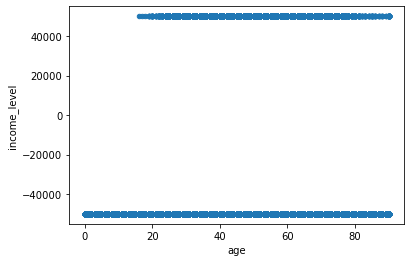

In [151]:
cleaned_income_data.plot(kind='scatter',x='age',y='income_level')

#About age is 18 years old and above people are having distributed across the high income group


In [152]:
high_income_df=cleaned_income_data[cleaned_income_data['income_level'] ==50000]

In [155]:
high_income_df['income_level'].head()

57    50000
64    50000
68    50000
80    50000
88    50000
Name: income_level, dtype: int64

In [156]:
low_income_df=cleaned_income_data[cleaned_income_data['income_level']==-50000]

In [157]:
low_income_df['income_level'].head()

0   -50000
1   -50000
2   -50000
3   -50000
4   -50000
Name: income_level, dtype: int64

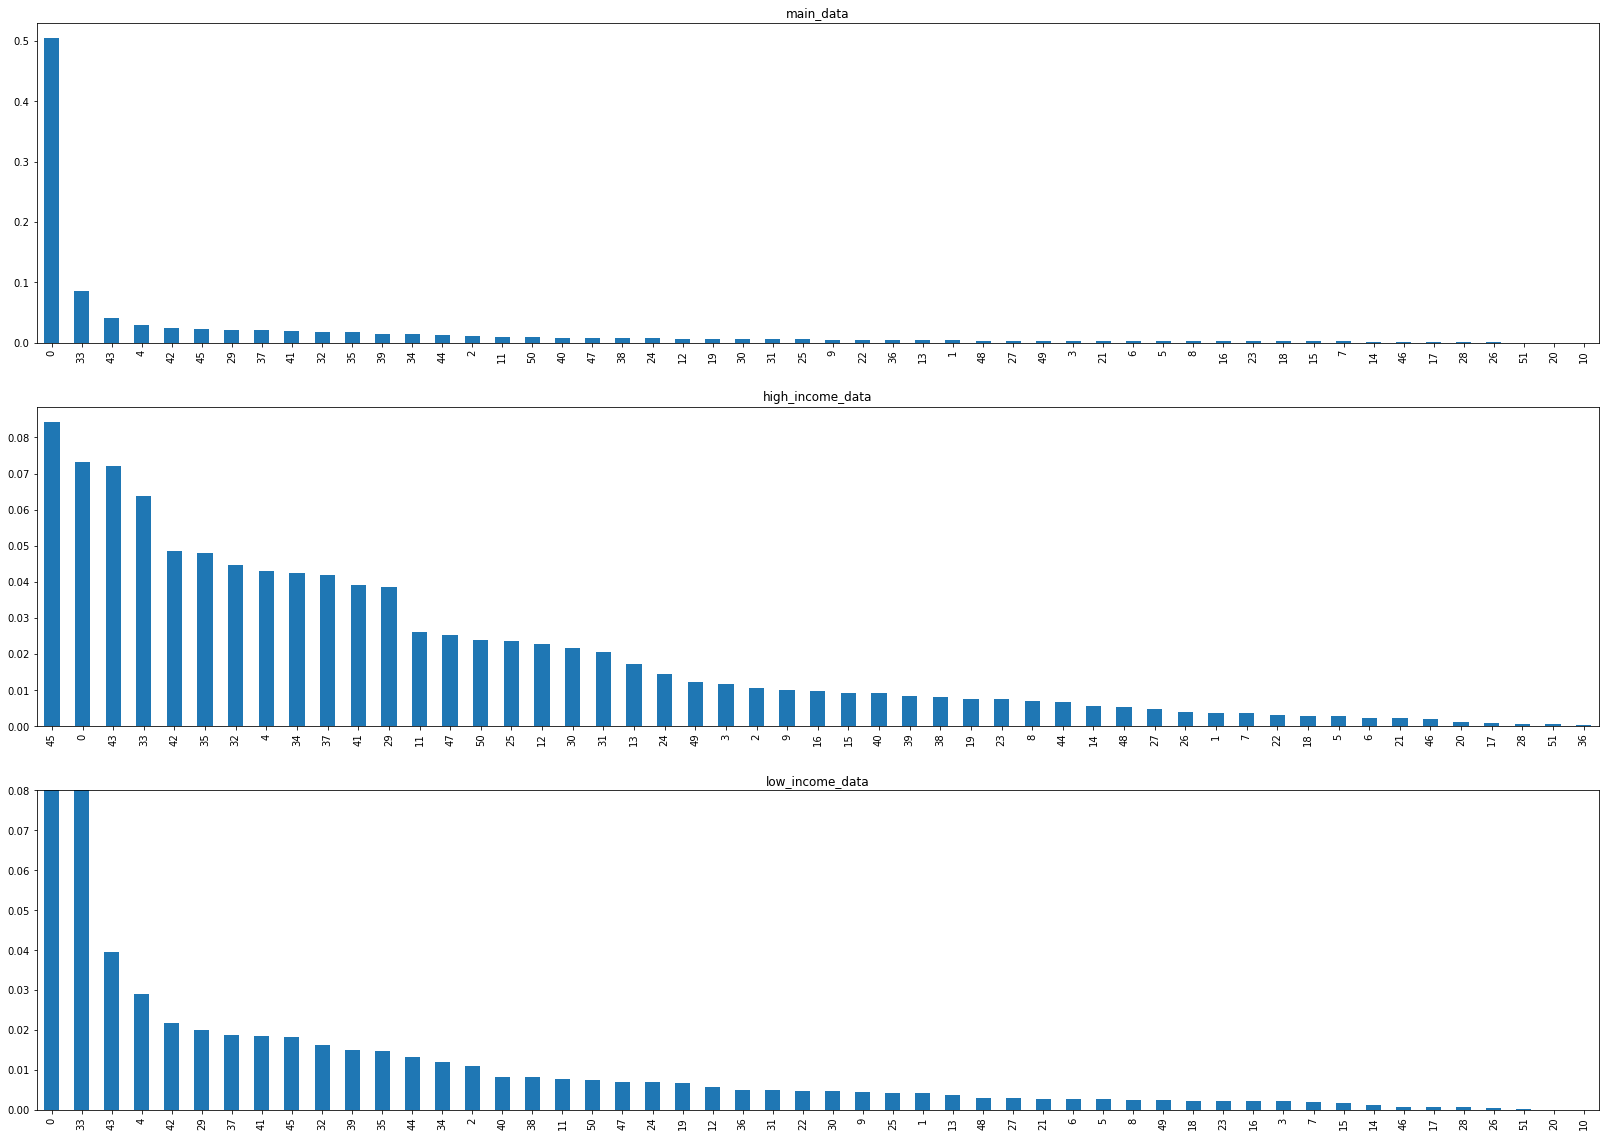

In [166]:
fig,ax=plt.subplots(3,1,figsize=(28,20))
cleaned_income_data.industry_code.value_counts(normalize=True).plot.bar(title='main_data',ax=ax[0])
high_income_df.industry_code.value_counts(normalize=True).plot.bar(title='high_income_data',ax=ax[1])
low_income_df.industry_code.value_counts(normalize=True).plot.bar(title='low_income_data',ax=ax[2])
plt.ylim(0,0.08)
plt.show()

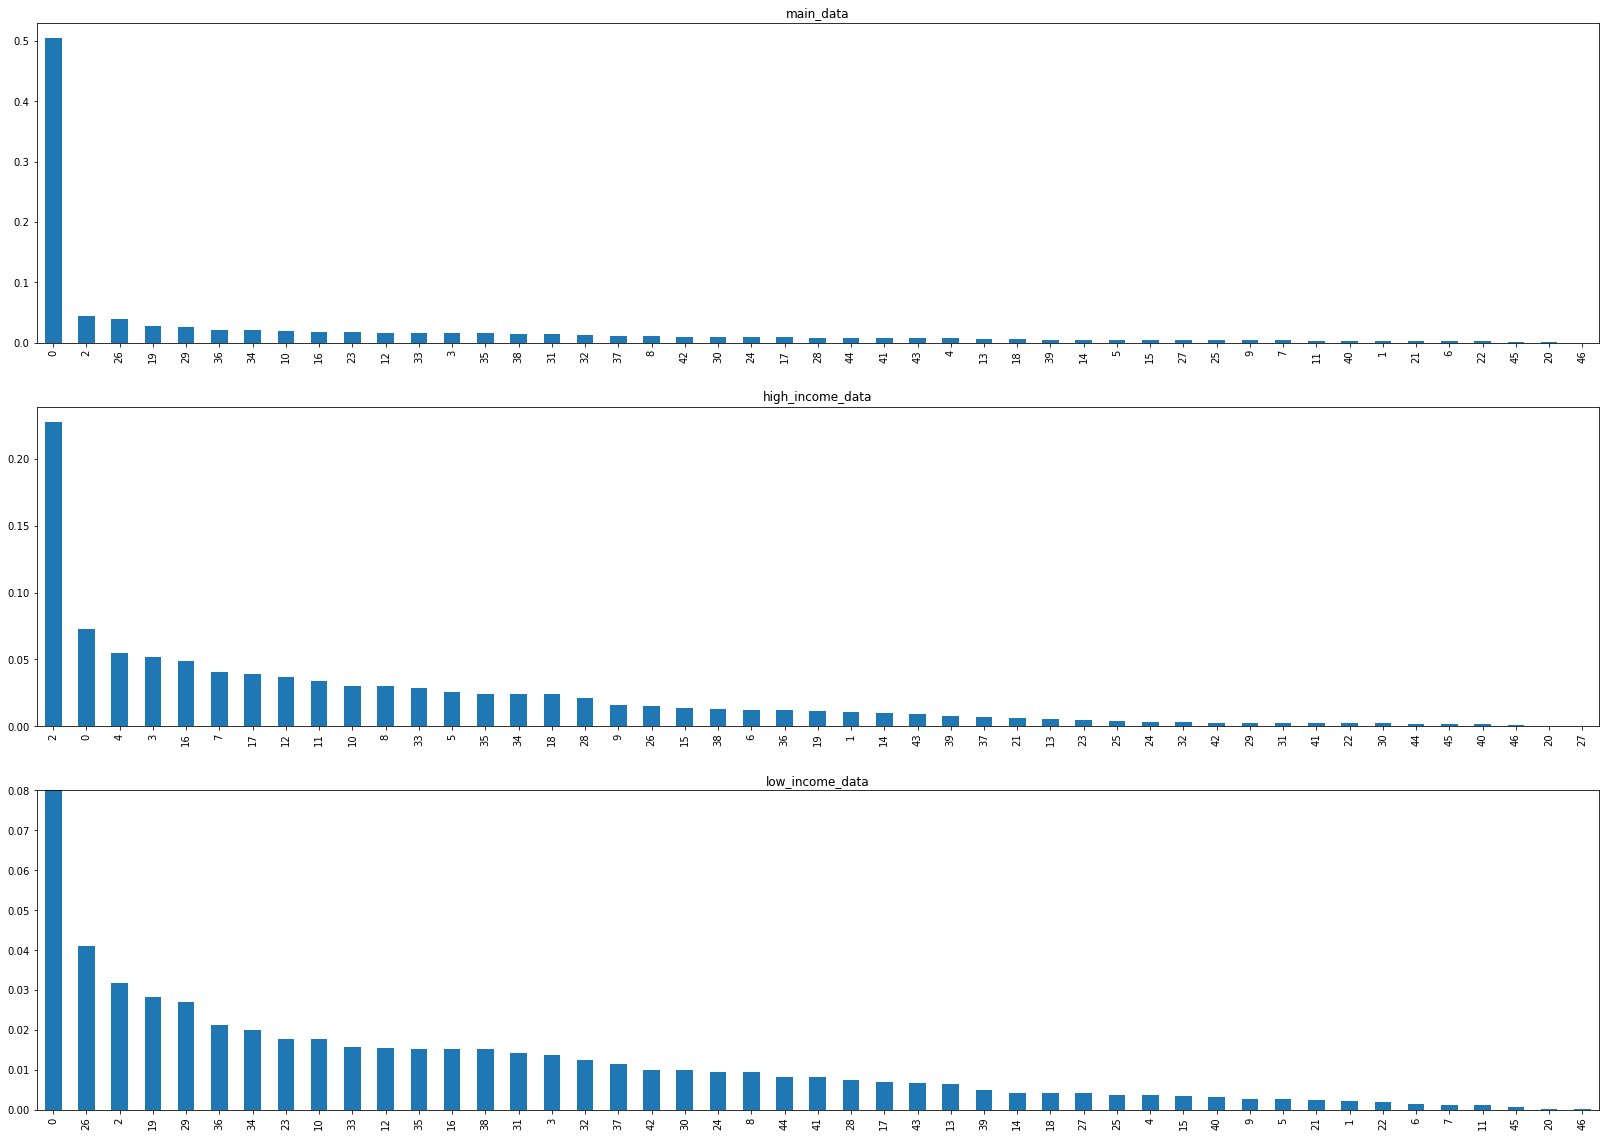

In [167]:
fig,ax=plt.subplots(3,1,figsize=(28,20))
cleaned_income_data.occupation_code.value_counts(normalize=True).plot.bar(title='main_data',ax=ax[0])
high_income_df.occupation_code.value_counts(normalize=True).plot.bar(title='high_income_data',ax=ax[1])
low_income_df.occupation_code.value_counts(normalize=True).plot.bar(title='low_income_data',ax=ax[2])
plt.ylim(0,0.08)
plt.show()

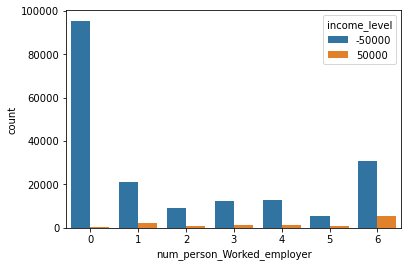

In [169]:
sns.countplot(x="num_person_Worked_employer",hue="income_level",data=cleaned_income_data)

#number of working persons as a employee very high out of 6 categorical values have high income than low number of working people otherwise we can think as all the people are employees in a family have high income 


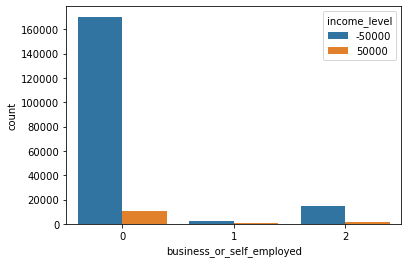

In [171]:
sns.countplot(x="business_or_self_employed",hue="income_level",data=cleaned_income_data)

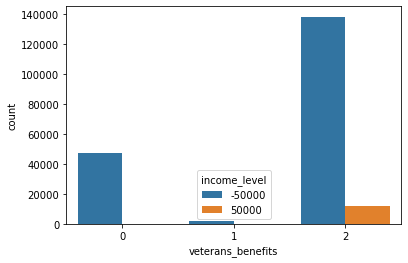

In [174]:
# cleaned_income_data.veterans_benefits.value_counts()
sns.countplot(x="veterans_benefits",hue="income_level",data=cleaned_income_data)

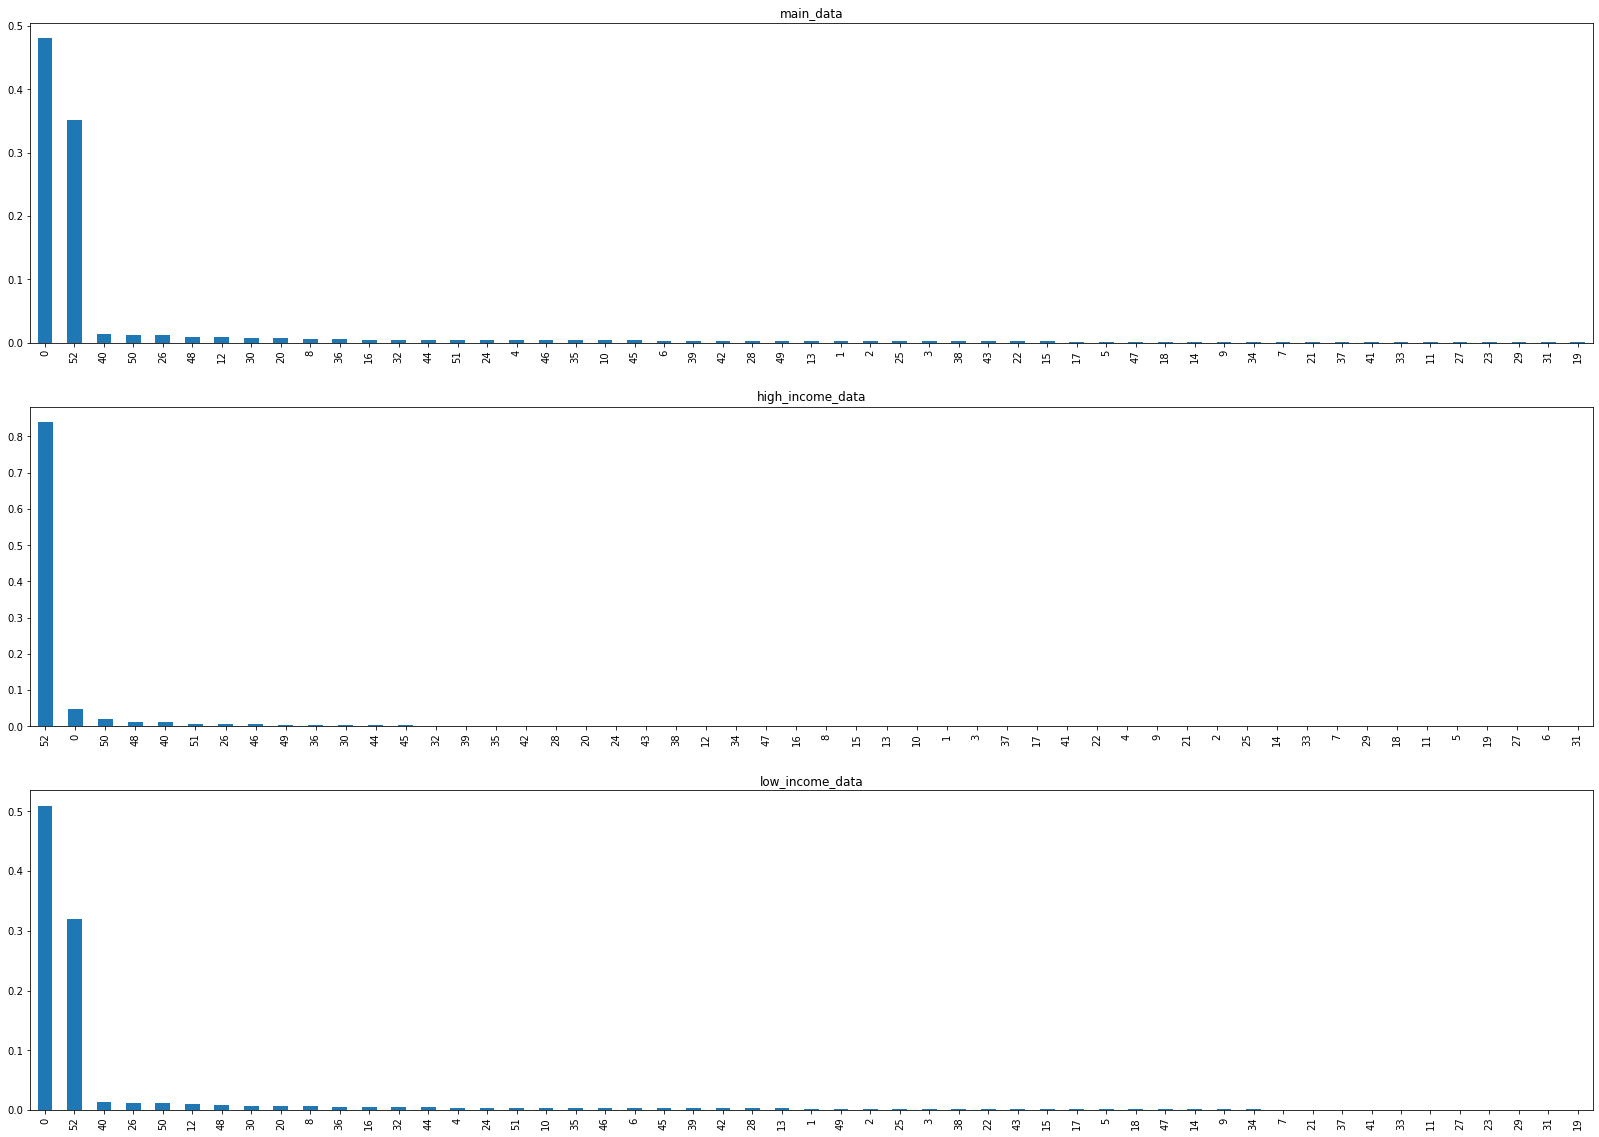

In [178]:
fig,ax=plt.subplots(3,1,figsize=(28,20))
cleaned_income_data.weeks_worked_in_year.value_counts(normalize=True).plot.bar(title='main_data',ax=ax[0])
high_income_df.weeks_worked_in_year.value_counts(normalize=True).plot.bar(title='high_income_data',ax=ax[1])
low_income_df.weeks_worked_in_year.value_counts(normalize=True).plot.bar(title='low_income_data',ax=ax[2])
# plt.ylim(0,0.08)
plt.show()

#Its simply shows that if a person is working more number of weeks in a year have high income

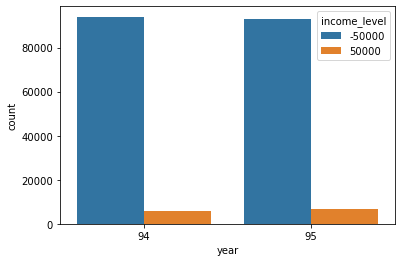

In [185]:
sns.countplot(x='year',hue='income_level',data=cleaned_income_data)

#It shows that the data is taken from only two years 1994(94) and 1995(95)

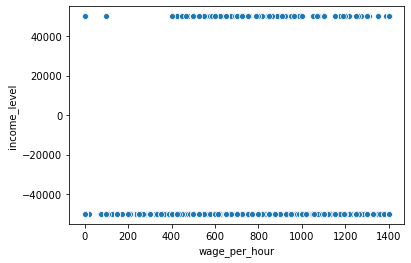

In [192]:
sns.scatterplot(x='wage_per_hour',y='income_level',data=cleaned_income_data)

#It shows that the person who is having more than 400 wage per hour are earning high income 

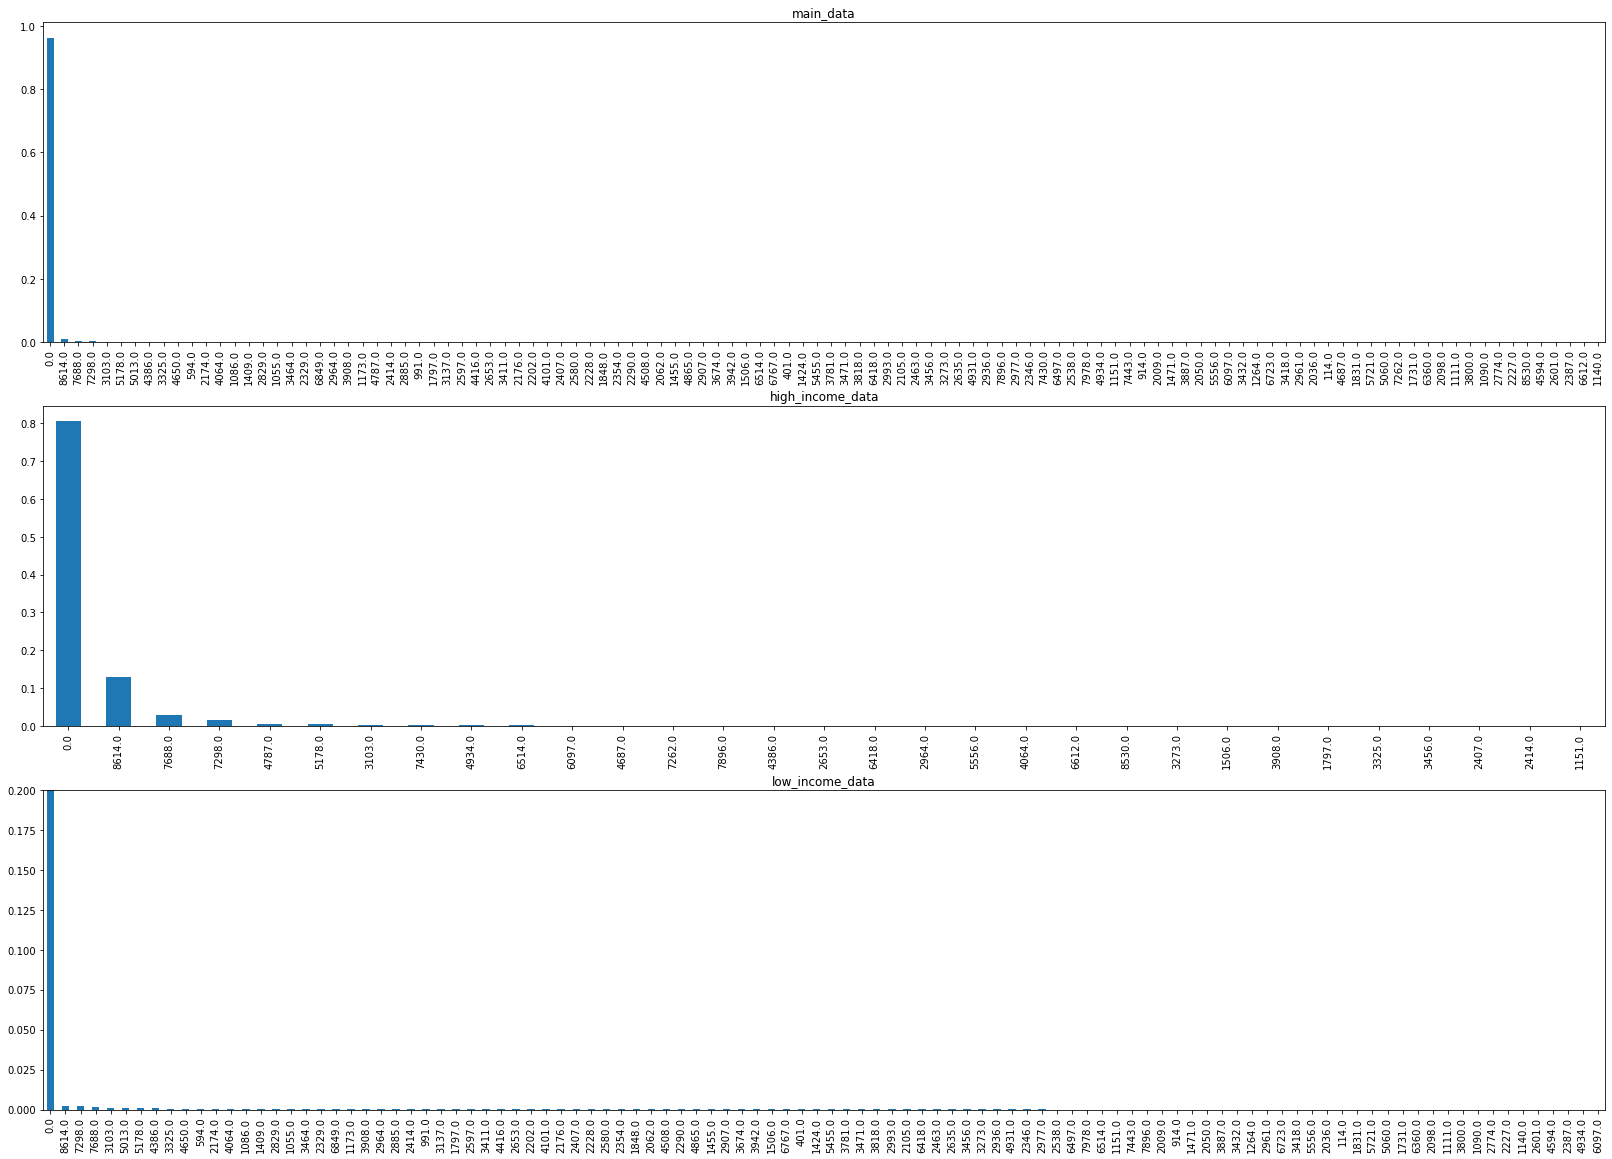

In [201]:
fig,ax=plt.subplots(3,1,figsize=(28,20))
cleaned_income_data.capital_gains.value_counts(normalize=True).plot.bar(title='main_data',ax=ax[0])
high_income_df.capital_gains.value_counts(normalize=True).plot.bar(title='high_income_data',ax=ax[1])
plt.ylim(0,0.2)
low_income_df.capital_gains.value_counts(normalize=True).plot.bar(title='low_income_data',ax=ax[2])
plt.ylim(0,0.2)
plt.show()

#Only few having the capital_gains those have high income level

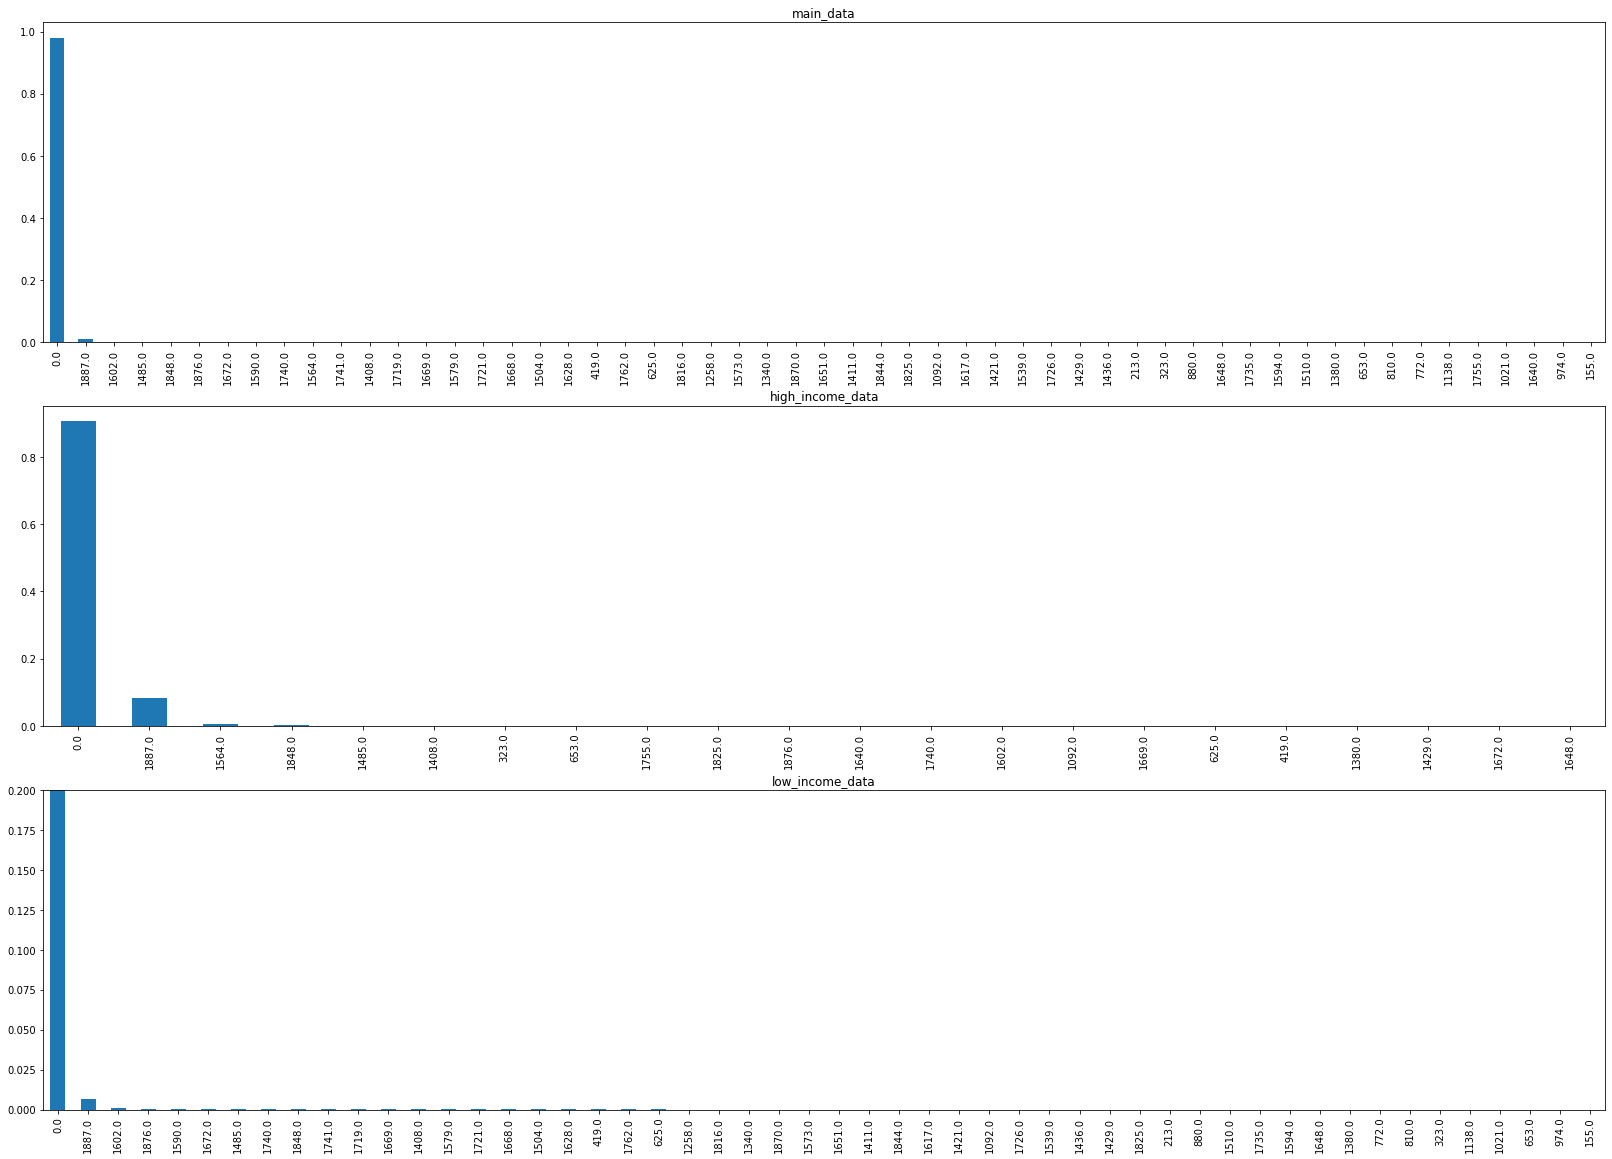

In [202]:

fig,ax=plt.subplots(3,1,figsize=(28,20))
cleaned_income_data.capital_losses.value_counts(normalize=True).plot.bar(title='main_data',ax=ax[0])
high_income_df.capital_losses.value_counts(normalize=True).plot.bar(title='high_income_data',ax=ax[1])
# plt.ylim(0,0.2)
low_income_df.capital_losses.value_counts(normalize=True).plot.bar(title='low_income_data',ax=ax[2])
plt.ylim(0,0.2)
plt.show()


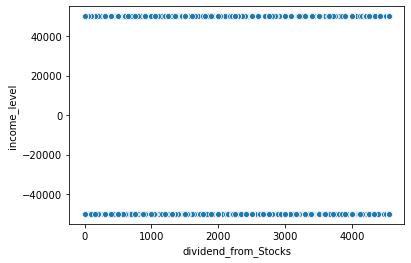

In [208]:
sns.scatterplot(x='dividend_from_Stocks',y='income_level',data=cleaned_income_data)


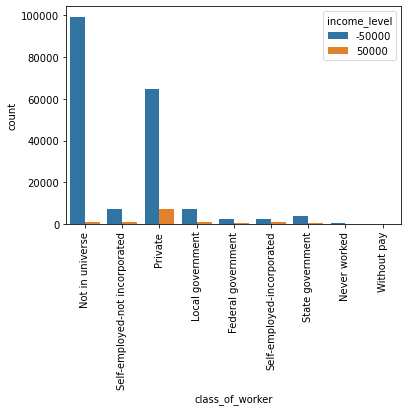

In [217]:
plt.figsize=(30,9)
sns.countplot(x='class_of_worker',hue='income_level',data=cleaned_income_data)
plt.xticks(rotation=90)
plt.show()


#Those who are working in the private sector are having high income level

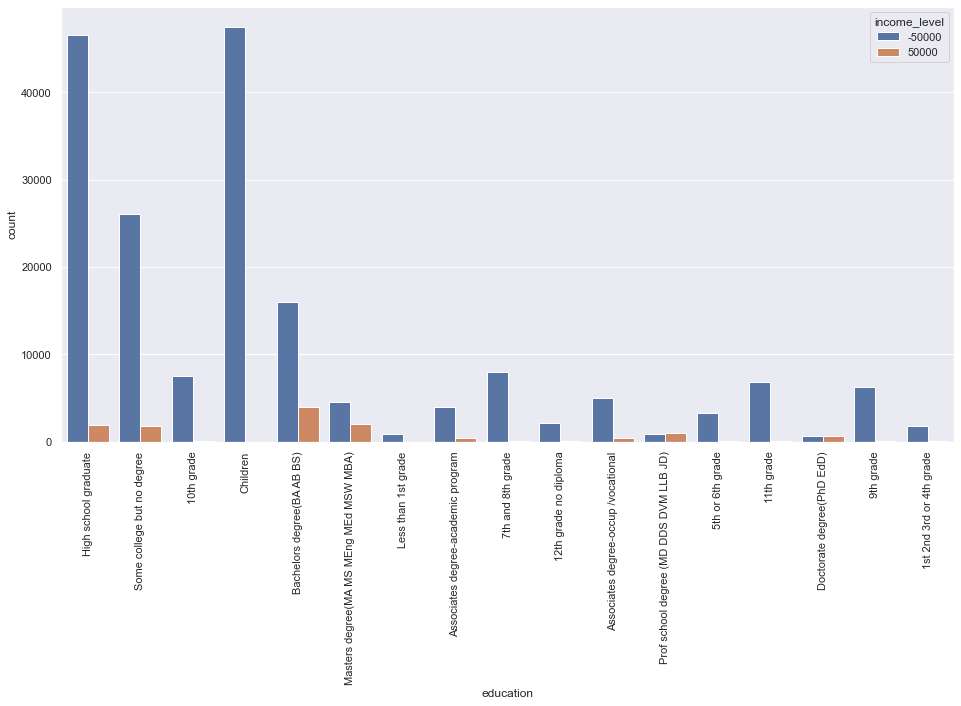

In [221]:
sns.set(rc={'figure.figsize':(16,8)})
sns.countplot(x='education',hue='income_level',data=cleaned_income_data)
plt.xticks(rotation=90)
plt.show()

Bachelors degree(BA AB BS) category educated people are high income because they they entered in to work 

In [223]:
cleaned_income_data.enrolled_in_edu_inst_lastwk.value_counts()

Not in universe          186943
High school                6892
College or university      5688
Name: enrolled_in_edu_inst_lastwk, dtype: int64

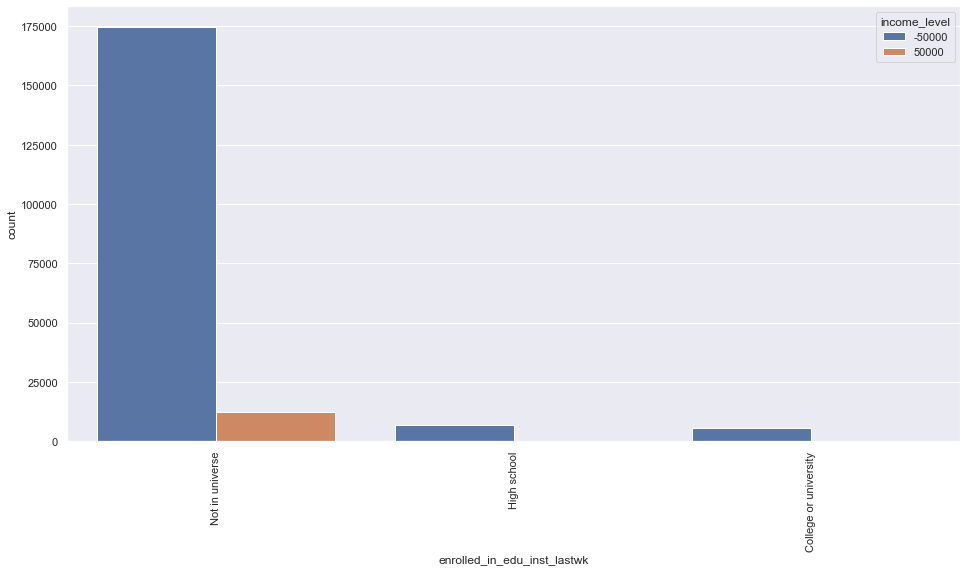

In [224]:
sns.set(rc={'figure.figsize':(16,8)})
sns.countplot(x='enrolled_in_edu_inst_lastwk',hue='income_level',data=cleaned_income_data)
plt.xticks(rotation=90)
plt.show()

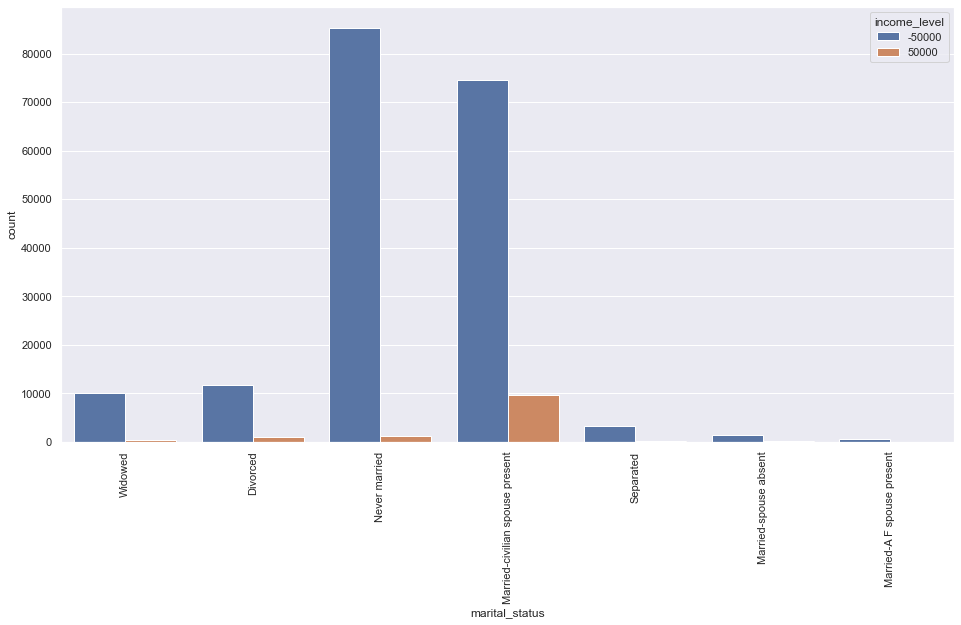

In [225]:
sns.set(rc={'figure.figsize':(16,8)})
sns.countplot(x='marital_status',hue='income_level',data=cleaned_income_data)
plt.xticks(rotation=90)
plt.show()

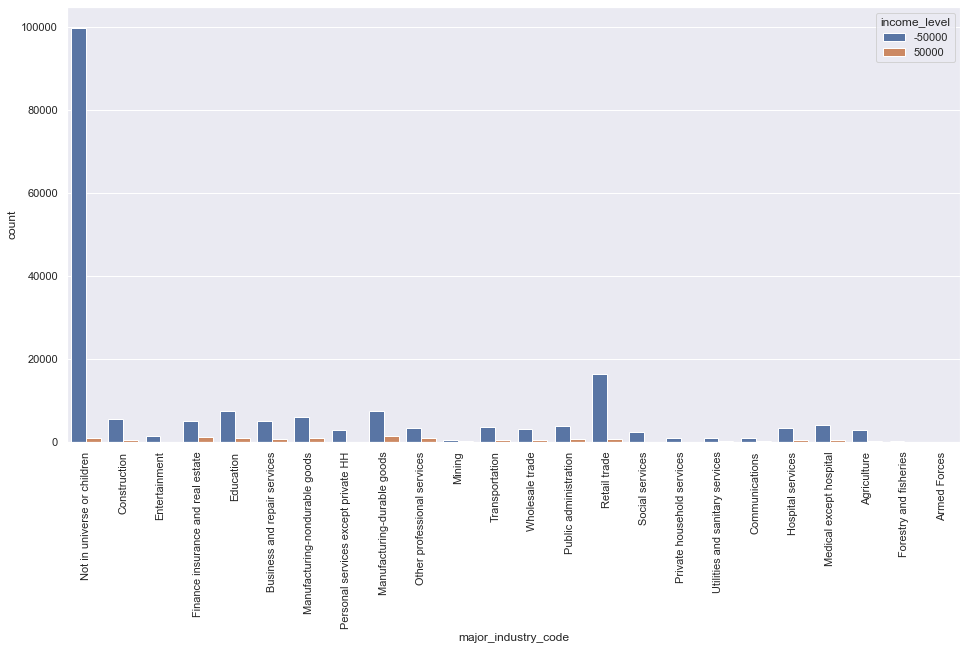

In [226]:
sns.set(rc={'figure.figsize':(16,8)})
sns.countplot(x='major_industry_code',hue='income_level',data=cleaned_income_data)
plt.xticks(rotation=90)
plt.show()

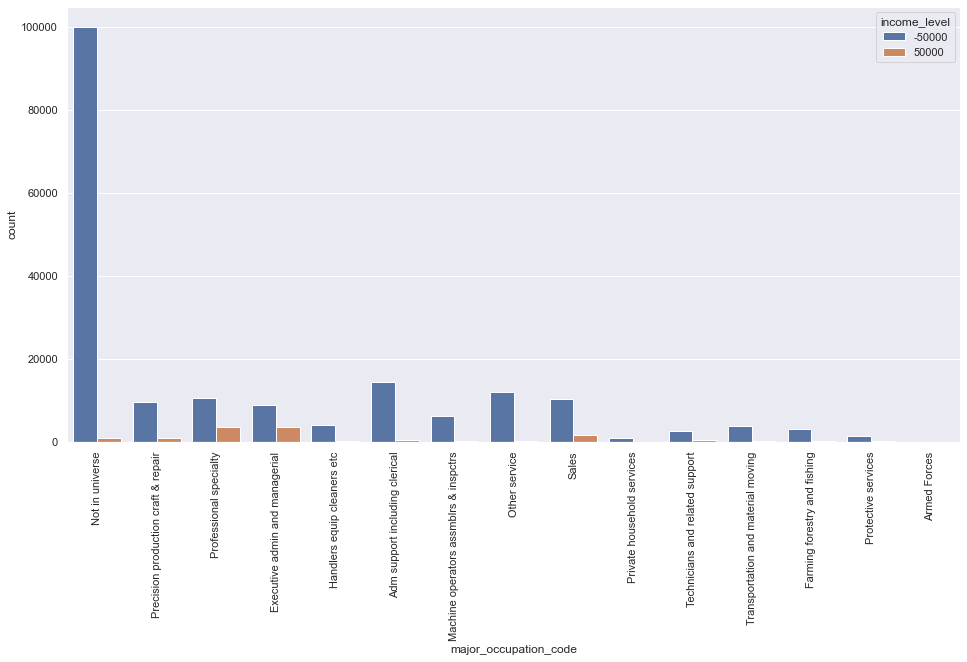

In [227]:
sns.set(rc={'figure.figsize':(16,8)})
sns.countplot(x='major_occupation_code',hue='income_level',data=cleaned_income_data)
plt.xticks(rotation=90)
plt.show()

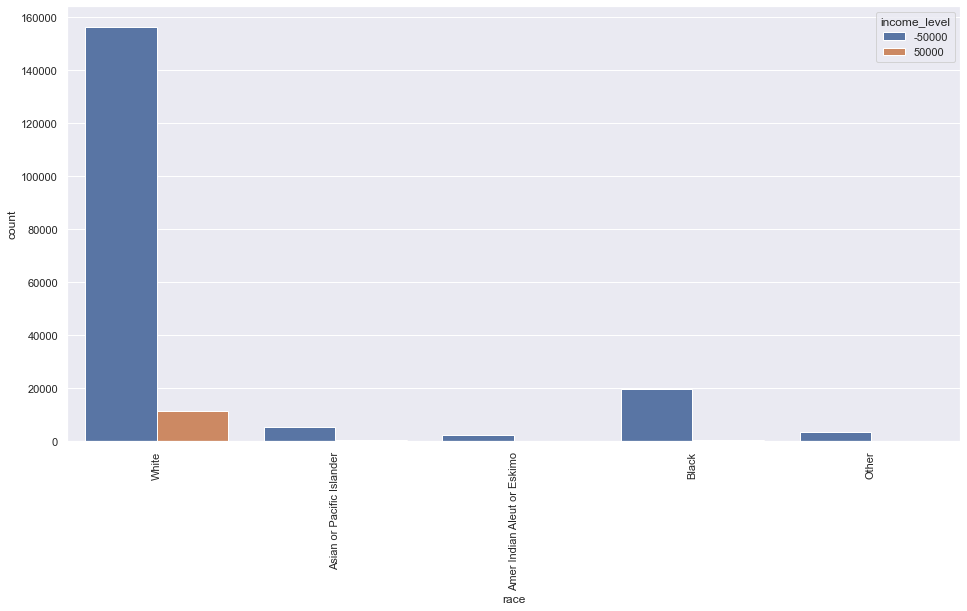

In [228]:
sns.set(rc={'figure.figsize':(16,8)})
sns.countplot(x='race',hue='income_level',data=cleaned_income_data)
plt.xticks(rotation=90)
plt.show()

#White people are hving high income level than the other category people

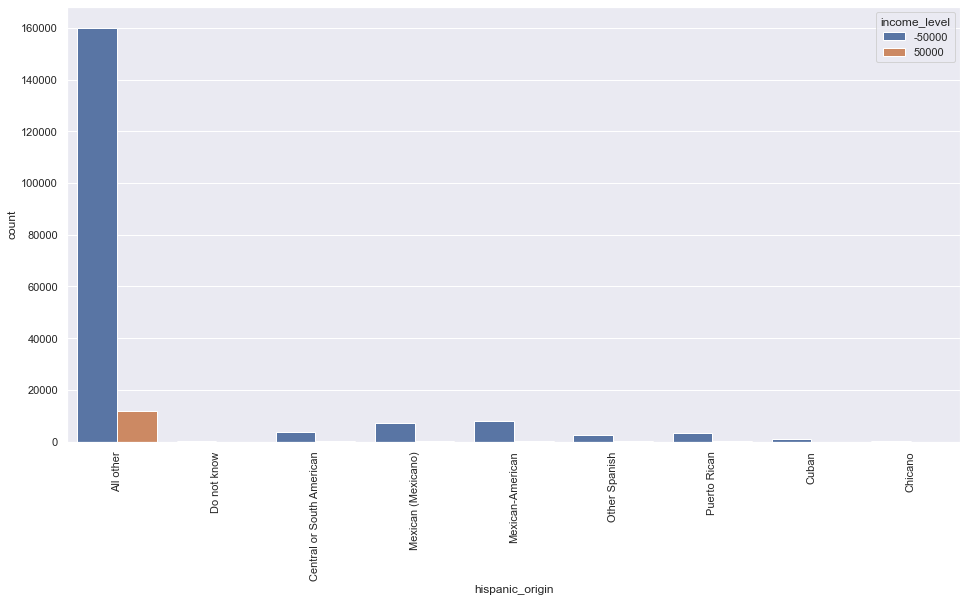

In [229]:
sns.set(rc={'figure.figsize':(16,8)})
sns.countplot(x='hispanic_origin',hue='income_level',data=cleaned_income_data)
plt.xticks(rotation=90)
plt.show()

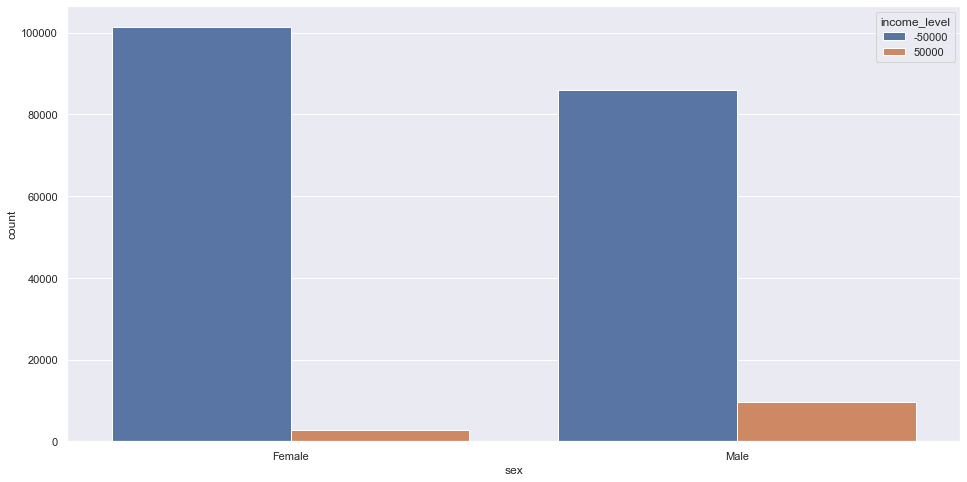

In [230]:
sns.countplot(x="sex",hue="income_level",data=cleaned_income_data)

#Male persons are having high income than the Female persons and also more Male people are present in this data set

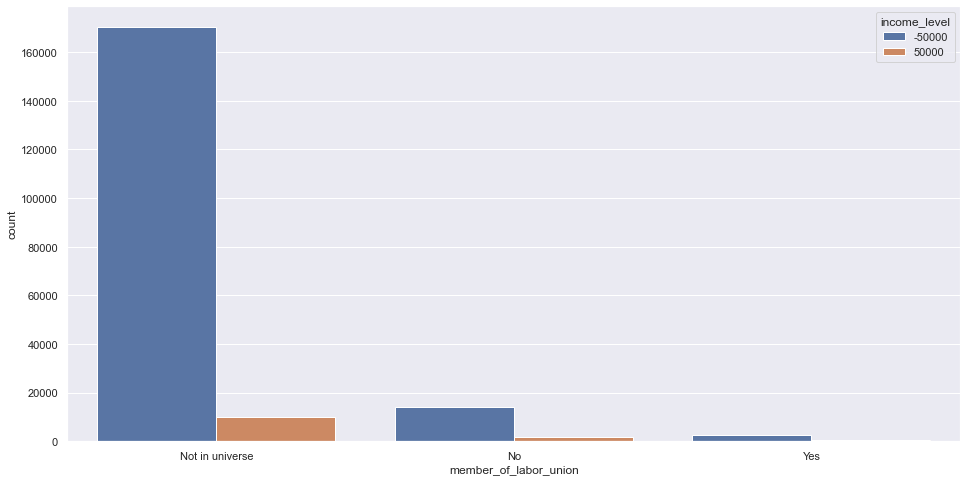

In [231]:
sns.countplot(x="member_of_labor_union",hue="income_level",data=cleaned_income_data)

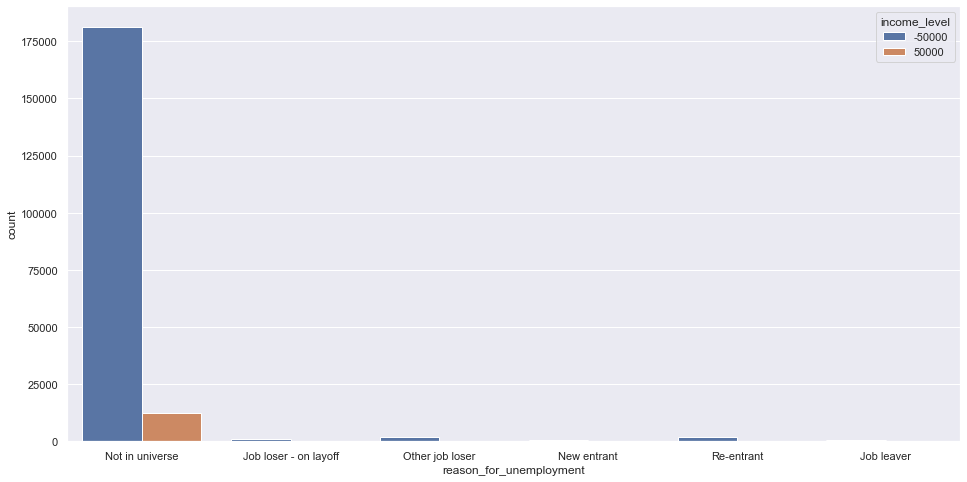

In [232]:
sns.countplot(x="reason_for_unemployment",hue="income_level",data=cleaned_income_data)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

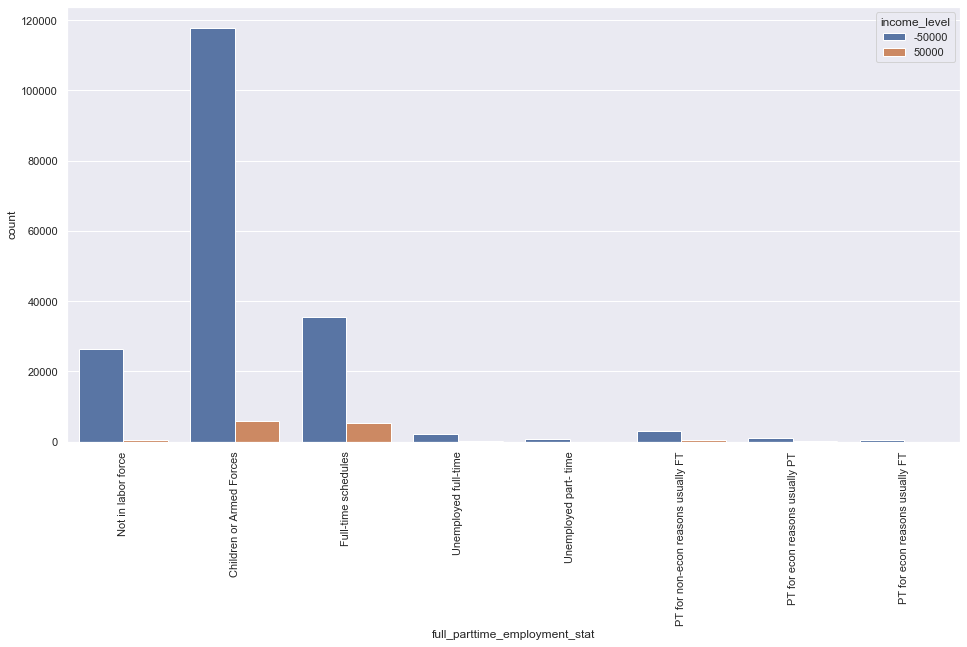

In [234]:
sns.countplot(x="full_parttime_employment_stat",hue="income_level",data=cleaned_income_data)
plt.xticks(rotation=90)

#Full time scheduled category people are having the high income then Armed forces

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

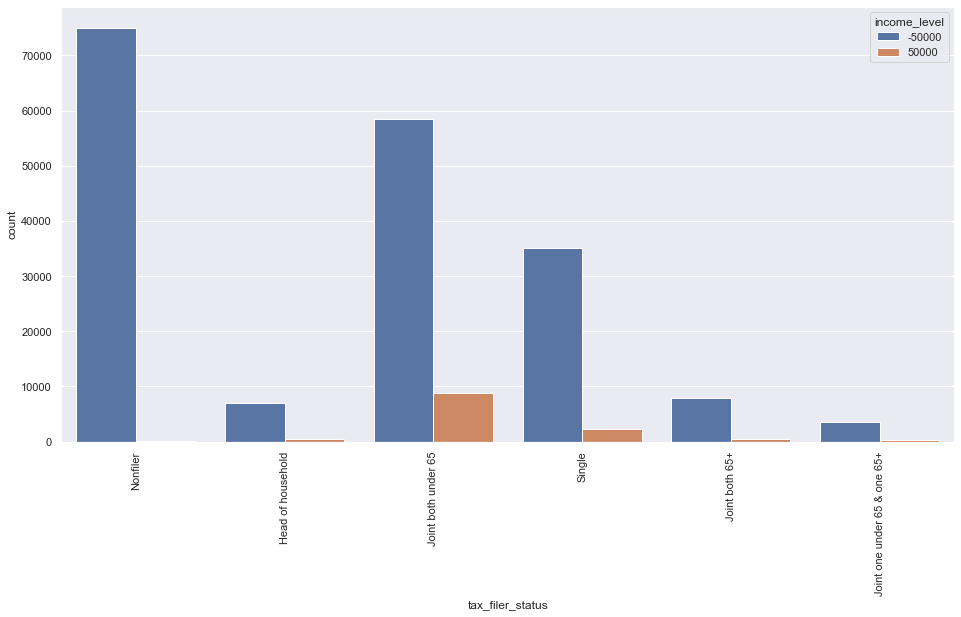

In [235]:
sns.countplot(x="tax_filer_status",hue="income_level",data=cleaned_income_data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

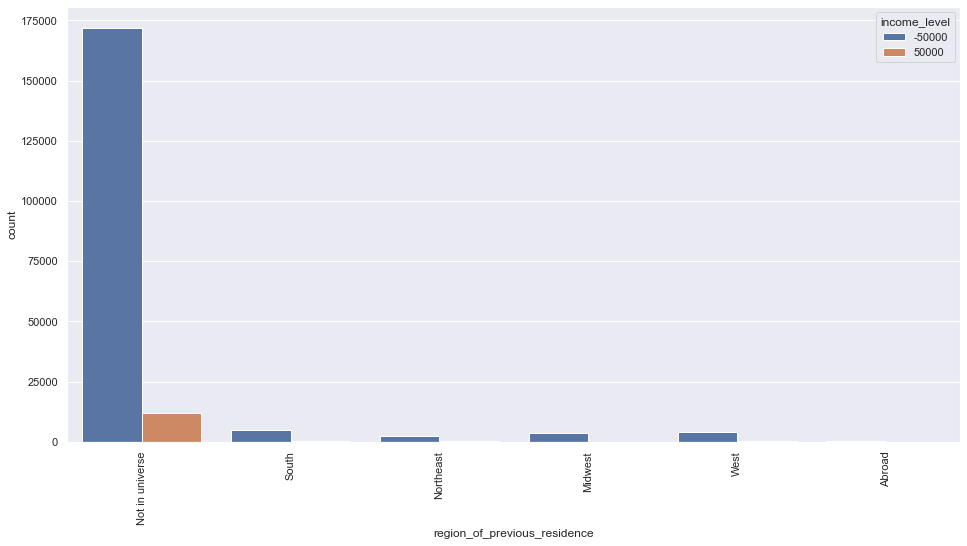

In [236]:
sns.countplot(x="region_of_previous_residence",hue="income_level",data=cleaned_income_data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

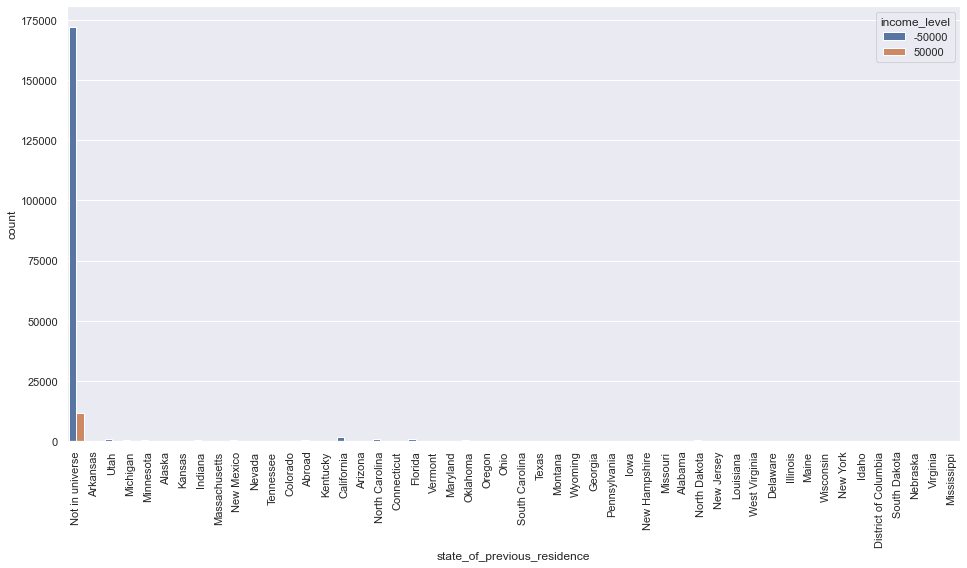

In [237]:
sns.countplot(x="state_of_previous_residence",hue="income_level",data=cleaned_income_data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text major ticklabel objects>)

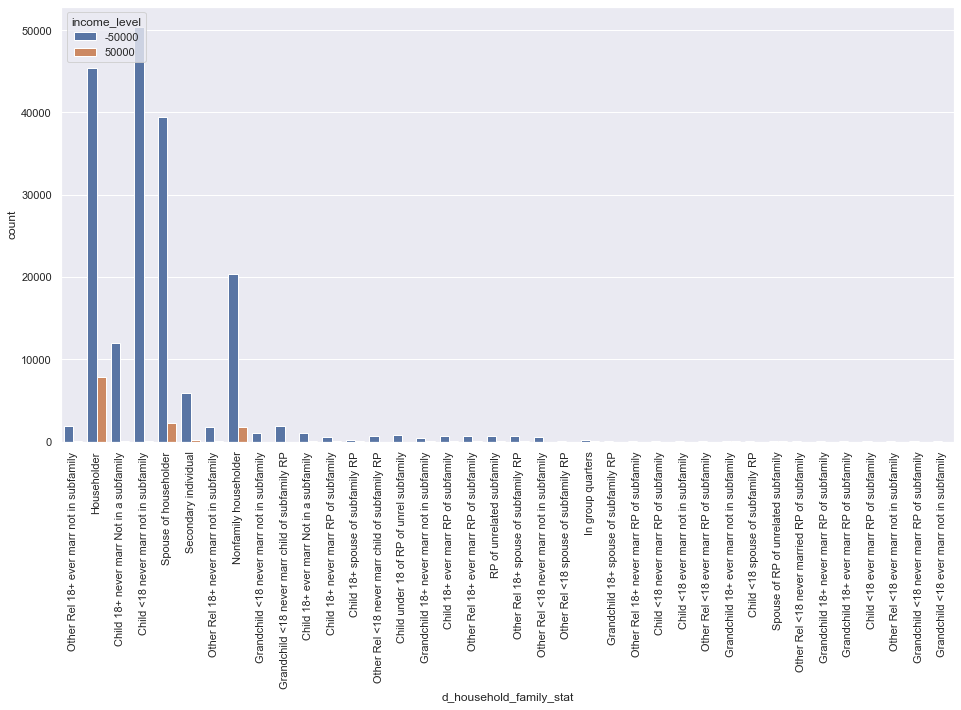

In [238]:
sns.countplot(x="d_household_family_stat",hue="income_level",data=cleaned_income_data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

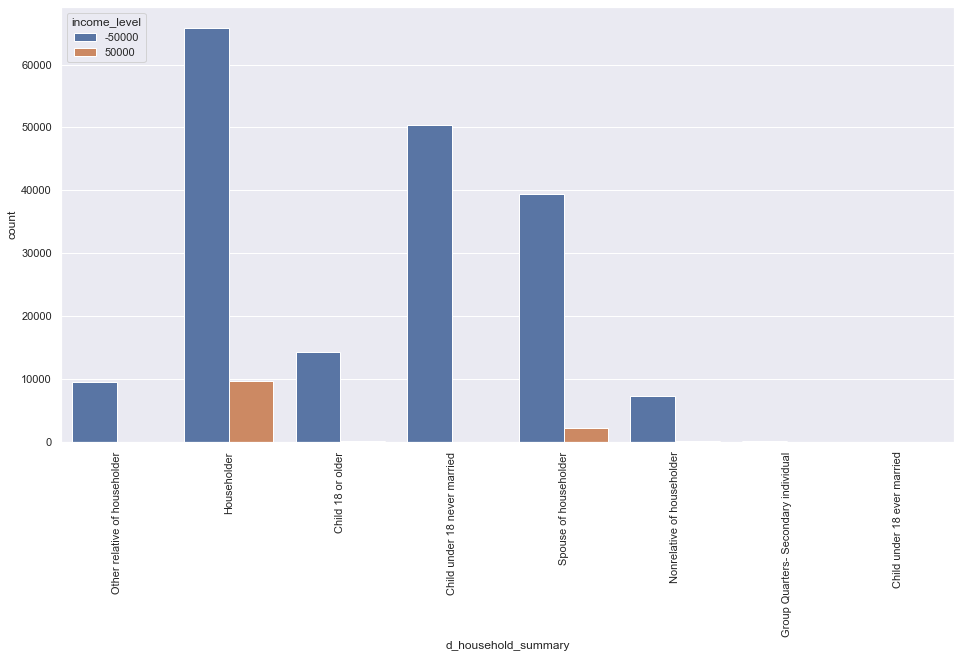

In [239]:
sns.countplot(x="d_household_summary",hue="income_level",data=cleaned_income_data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

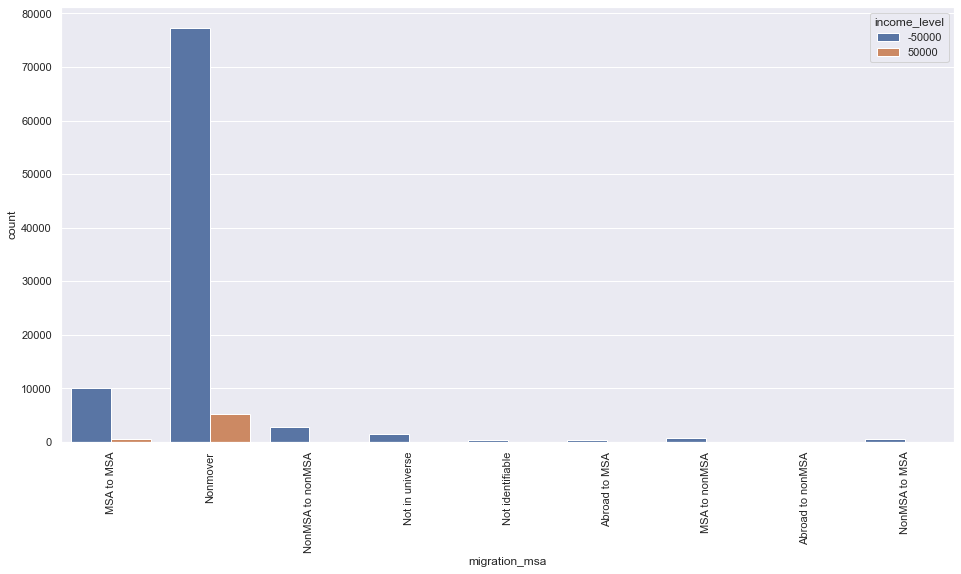

In [240]:
sns.countplot(x="migration_msa",hue="income_level",data=cleaned_income_data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

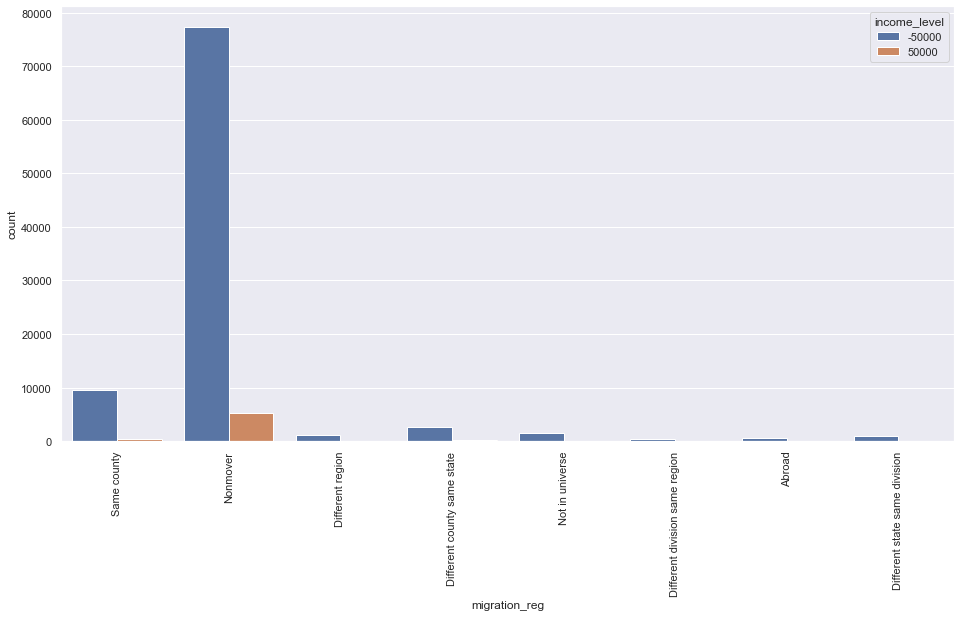

In [241]:
sns.countplot(x="migration_reg",hue="income_level",data=cleaned_income_data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

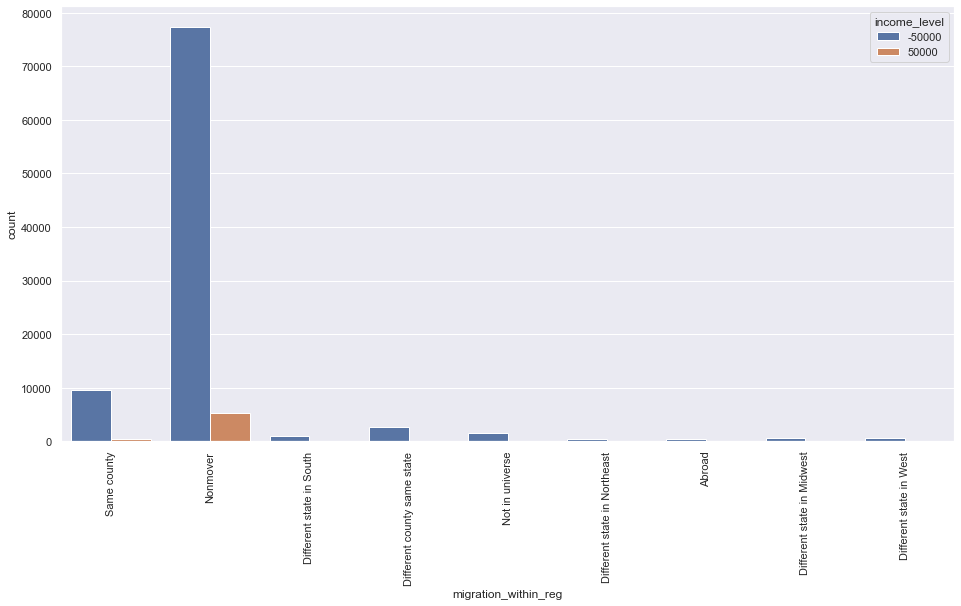

In [244]:
sns.countplot(x="migration_within_reg",hue="income_level",data=cleaned_income_data)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

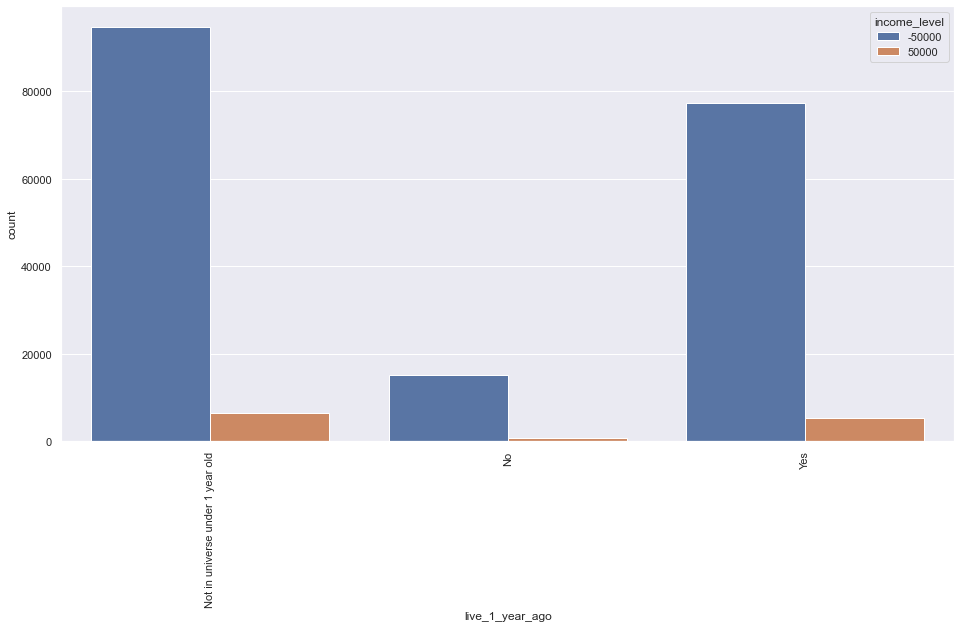

In [246]:
sns.countplot(x="live_1_year_ago",hue="income_level",data=cleaned_income_data)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

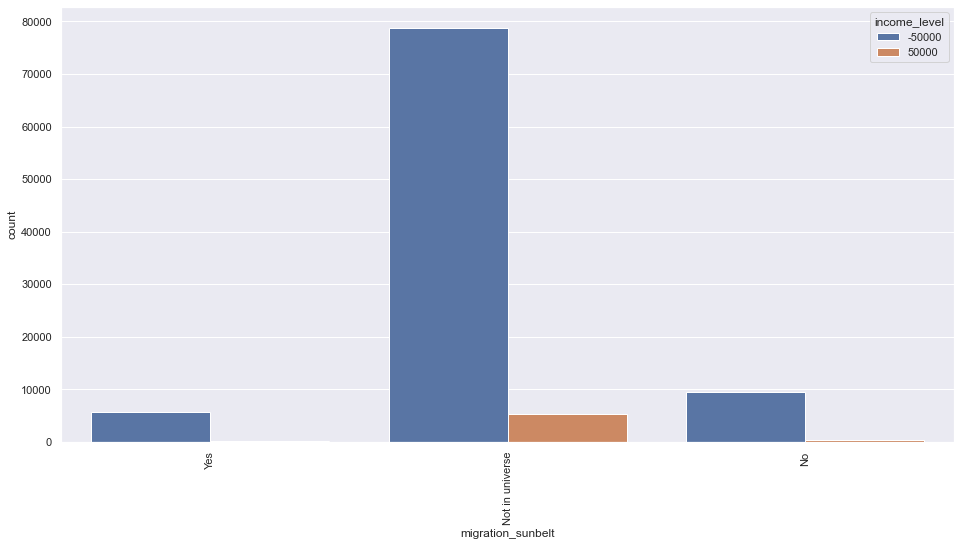

In [247]:
sns.countplot(x="migration_sunbelt",hue="income_level",data=cleaned_income_data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

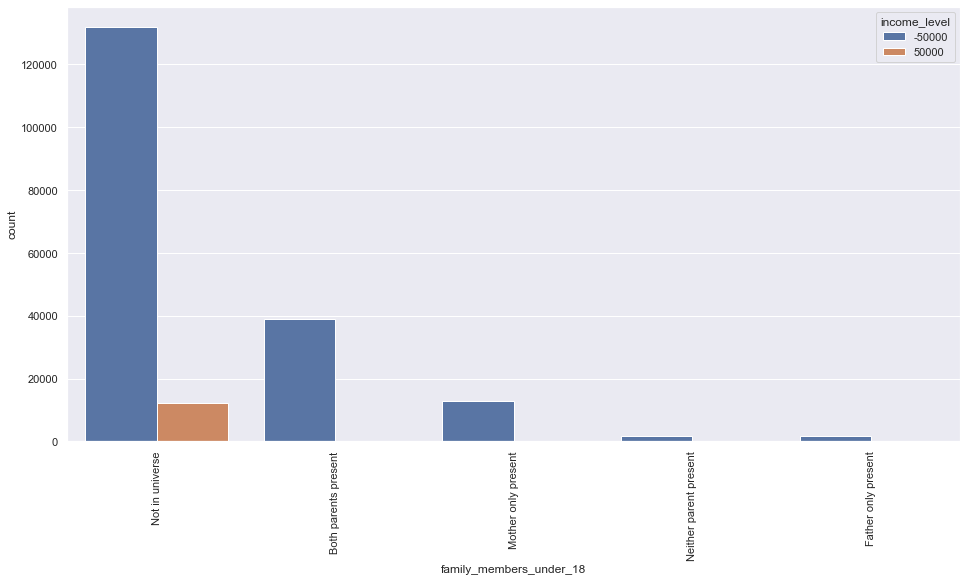

In [248]:
sns.countplot(x="family_members_under_18",hue="income_level",data=cleaned_income_data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

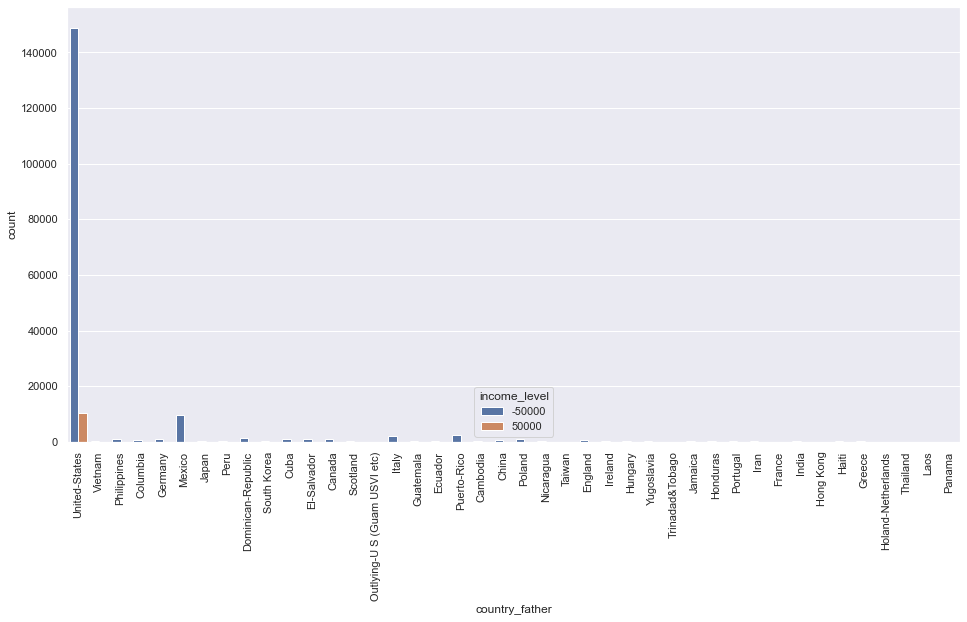

In [249]:
sns.countplot(x="country_father",hue="income_level",data=cleaned_income_data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

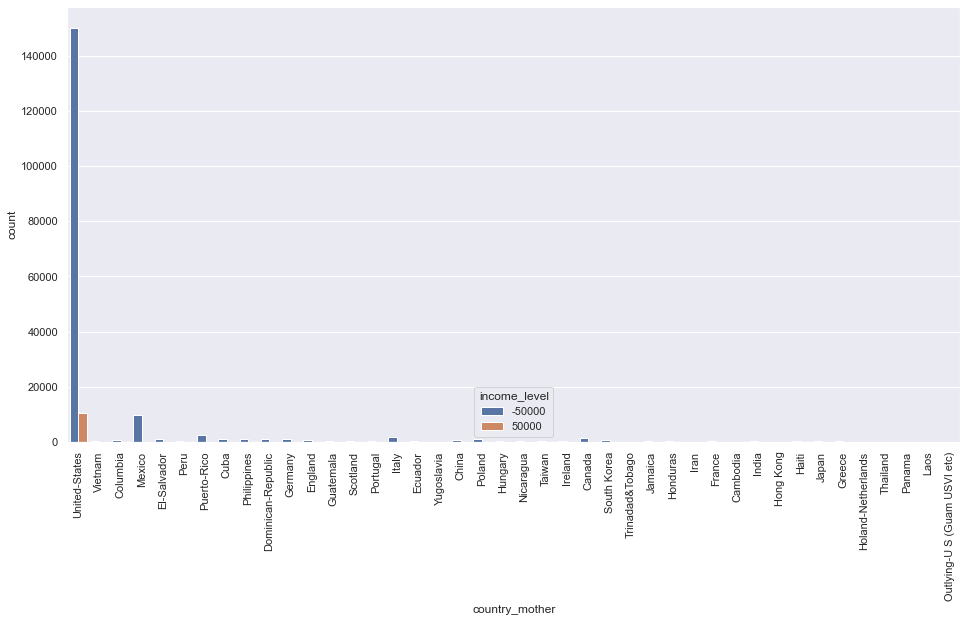

In [250]:
sns.countplot(x="country_mother",hue="income_level",data=cleaned_income_data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

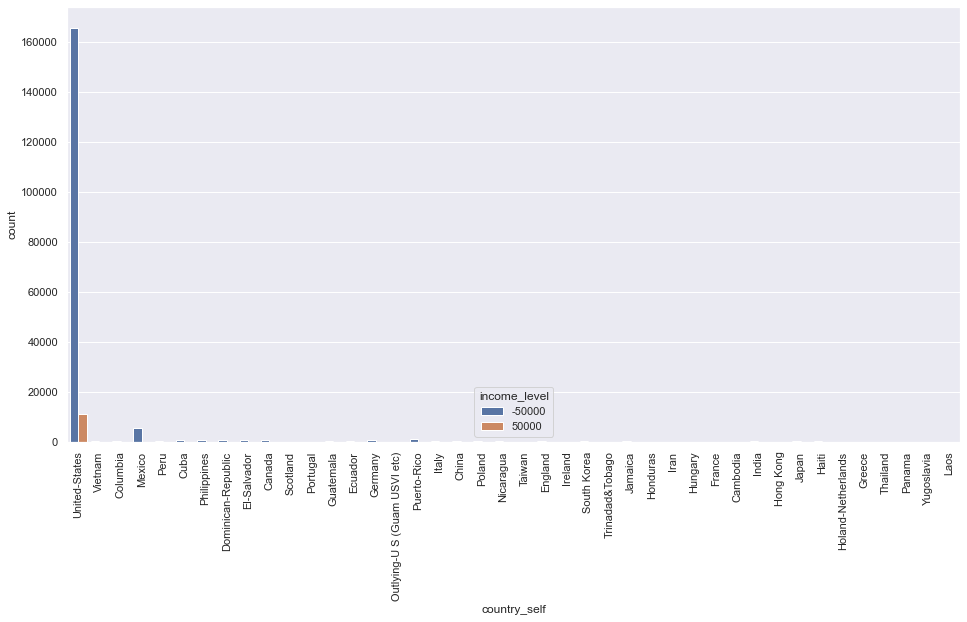

In [251]:
sns.countplot(x="country_self",hue="income_level",data=cleaned_income_data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

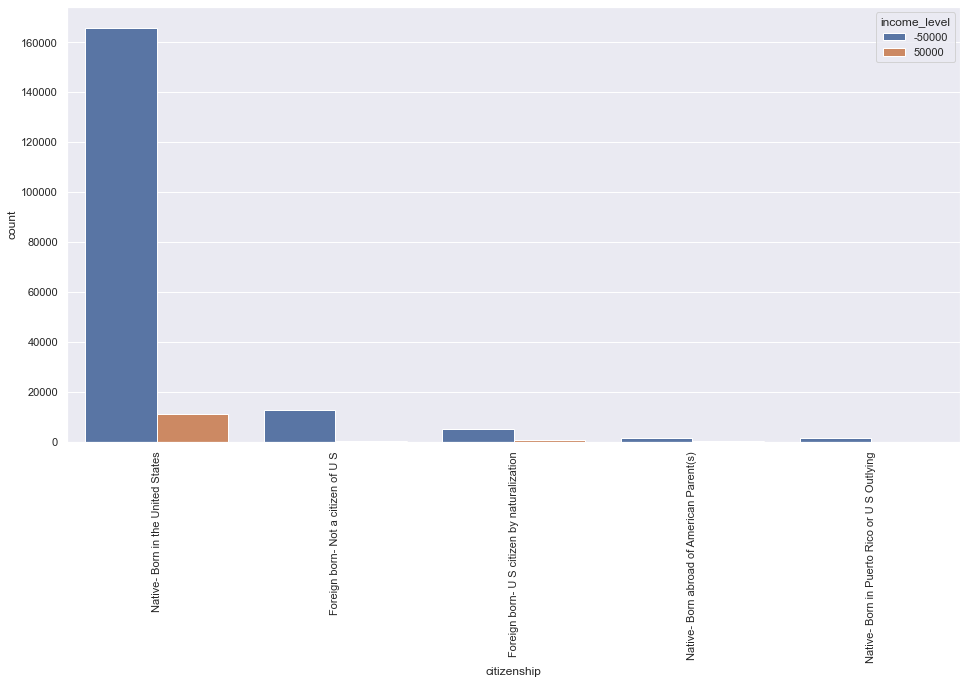

In [252]:
sns.countplot(x="citizenship",hue="income_level",data=cleaned_income_data)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

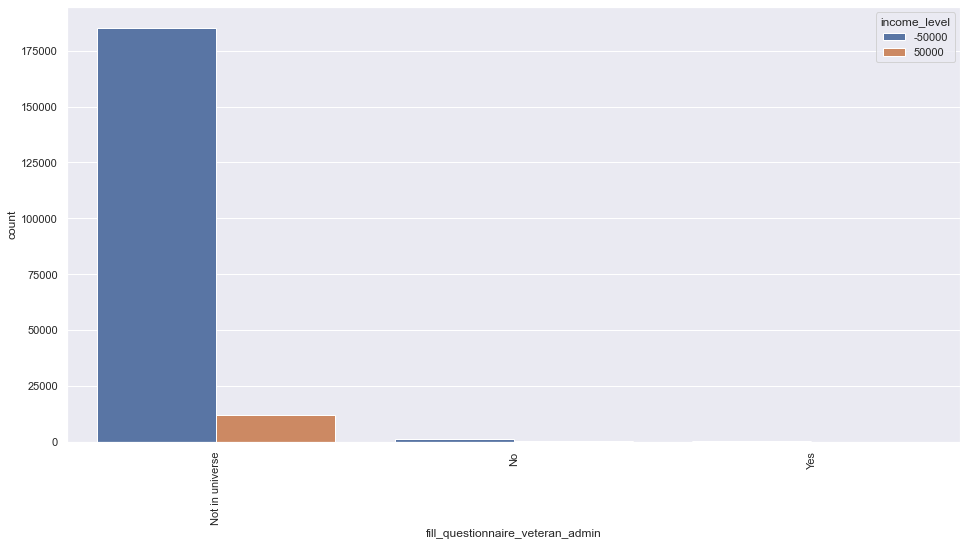

In [253]:
sns.countplot(x="fill_questionnaire_veteran_admin",hue="income_level",data=cleaned_income_data)
plt.xticks(rotation=90)

# Feature Engineering

industry_code and occupation_code having high categorical values so need to resuce them using the EDA

In [2]:
#Saving cleaned data in to excel 
# cleaned_income_data.to_excel(r'D:\cleaned_income_data.xlsx')
import pandas as pd
import matplotlib.pyplot as plt
cleaned_income_data=pd.read_excel(r'D:\cleaned_income_data.xlsx')
high_income_df=cleaned_income_data[cleaned_income_data['income_level'] ==50000]

low_income_df=cleaned_income_data[cleaned_income_data['income_level'] ==-50000]

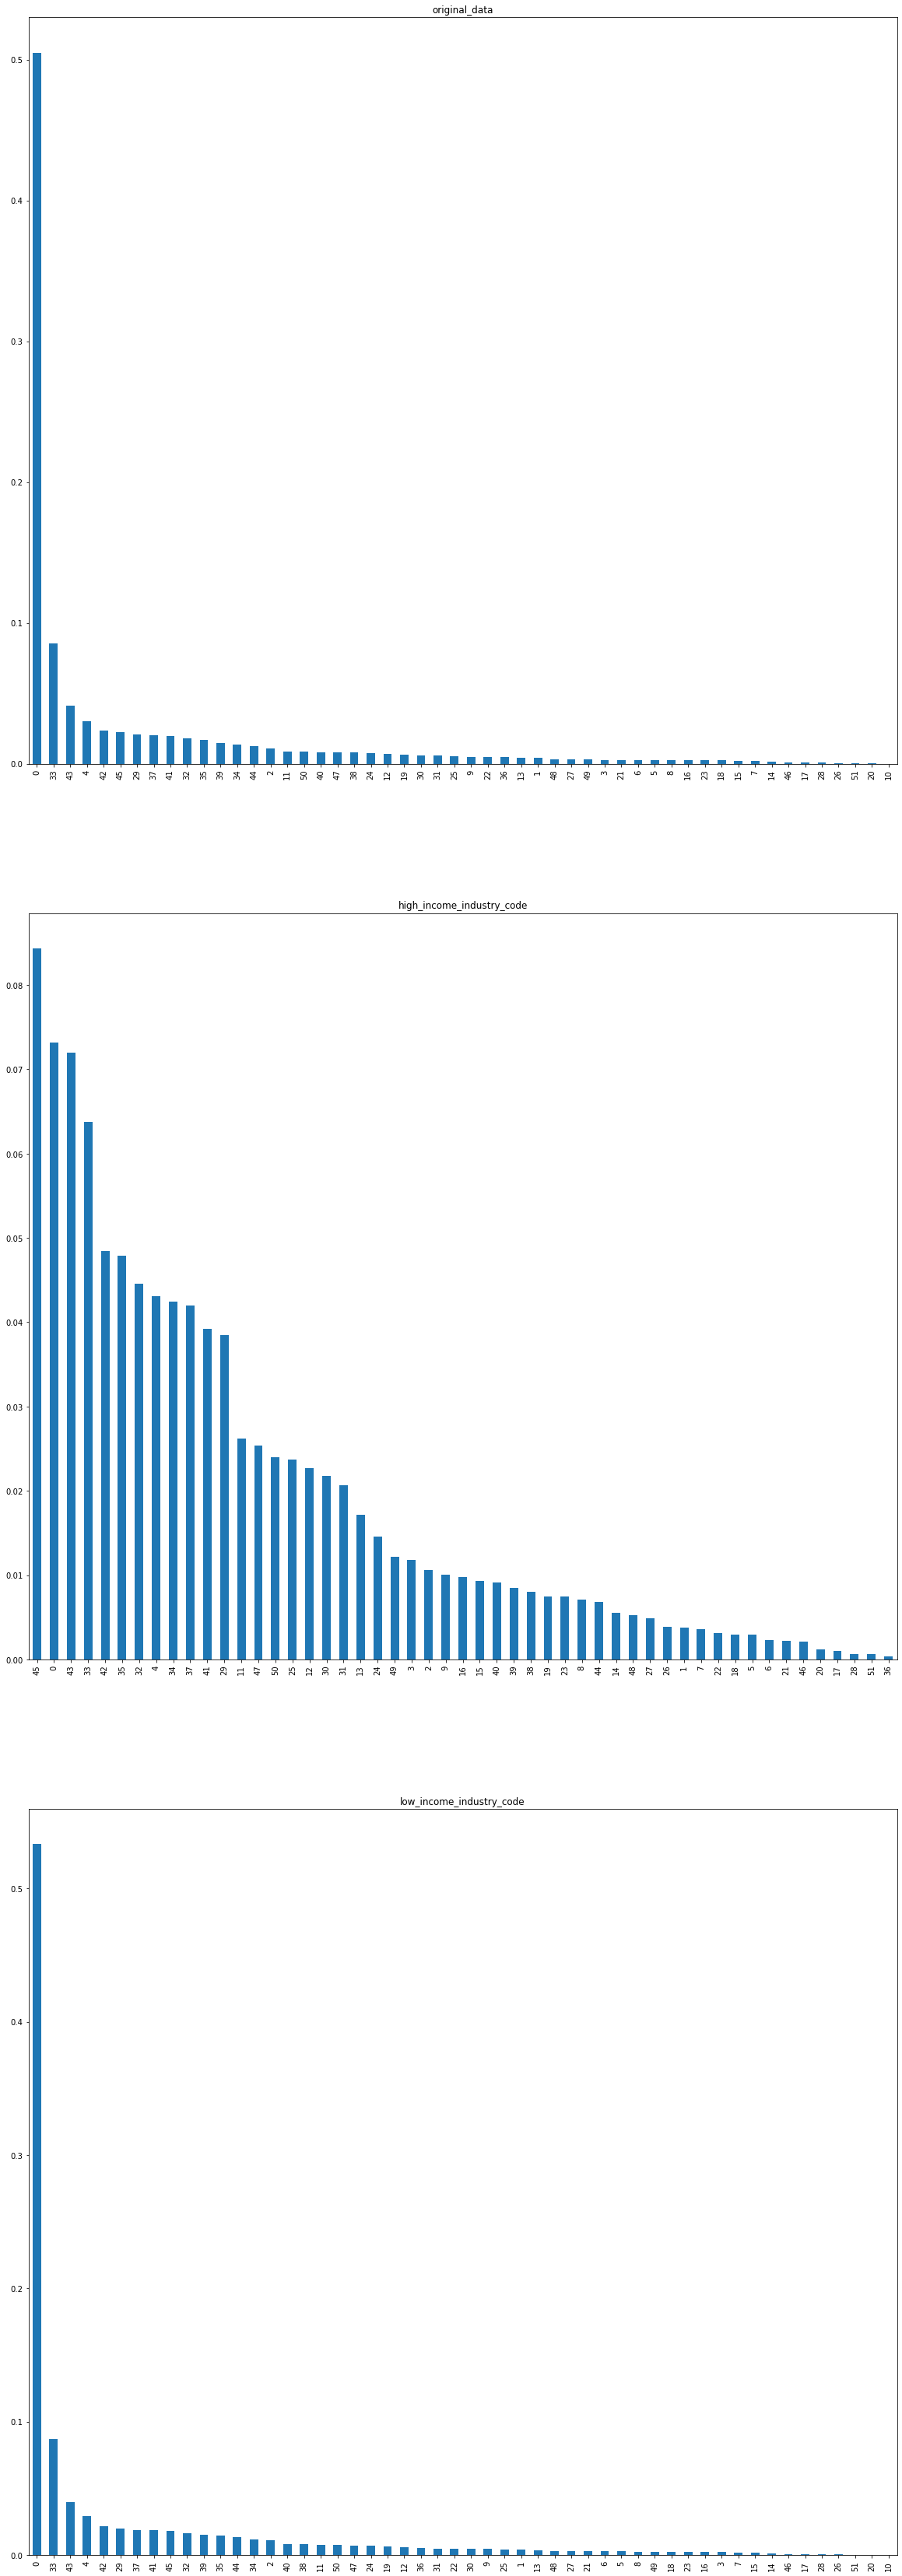

In [3]:
fig,ax=plt.subplots(3,1,figsize=(20,60))
cleaned_income_data['industry_code'].value_counts(normalize=True).plot.bar(title='original_data',ax=ax[0])
high_income_df['industry_code'].value_counts(normalize=True).plot.bar(title='high_income_industry_code',ax=ax[1])
# plt.ylim(0,0.1)
low_income_df['industry_code'].value_counts(normalize=True).plot.bar(title='low_income_industry_code',ax=ax[2])
# plt.ylim(0,0.08)
plt.show()

In [4]:
dict1={0:-1,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0,24:0,25:0,26:0,27:0,28:0,29:-1,30:0,31:0,32:0,33:-1,34:1,35:1,36:0,37:0,38:0,39:0,40:0,41:-1,42:0,43:1,44:0,45:1,46:0,47:0,48:0,49:0,50:0,51:0,52:0}


In [25]:
cleaned_income_data_industry=cleaned_income_data.replace({"industry_code": dict1})

In [26]:
cleaned_income_data_industry.industry_code.value_counts()

-1    125927
 0     54686
 1     18910
Name: industry_code, dtype: int64

In [29]:
cleaned_income_data_industry=cleaned_income_data_industry['industry_code']

In [30]:
cleaned_income_data_industry.shape

(199523,)

In [32]:
cleaned_income_data_industry.value_counts()

-1    125927
 0     54686
 1     18910
Name: industry_code, dtype: int64

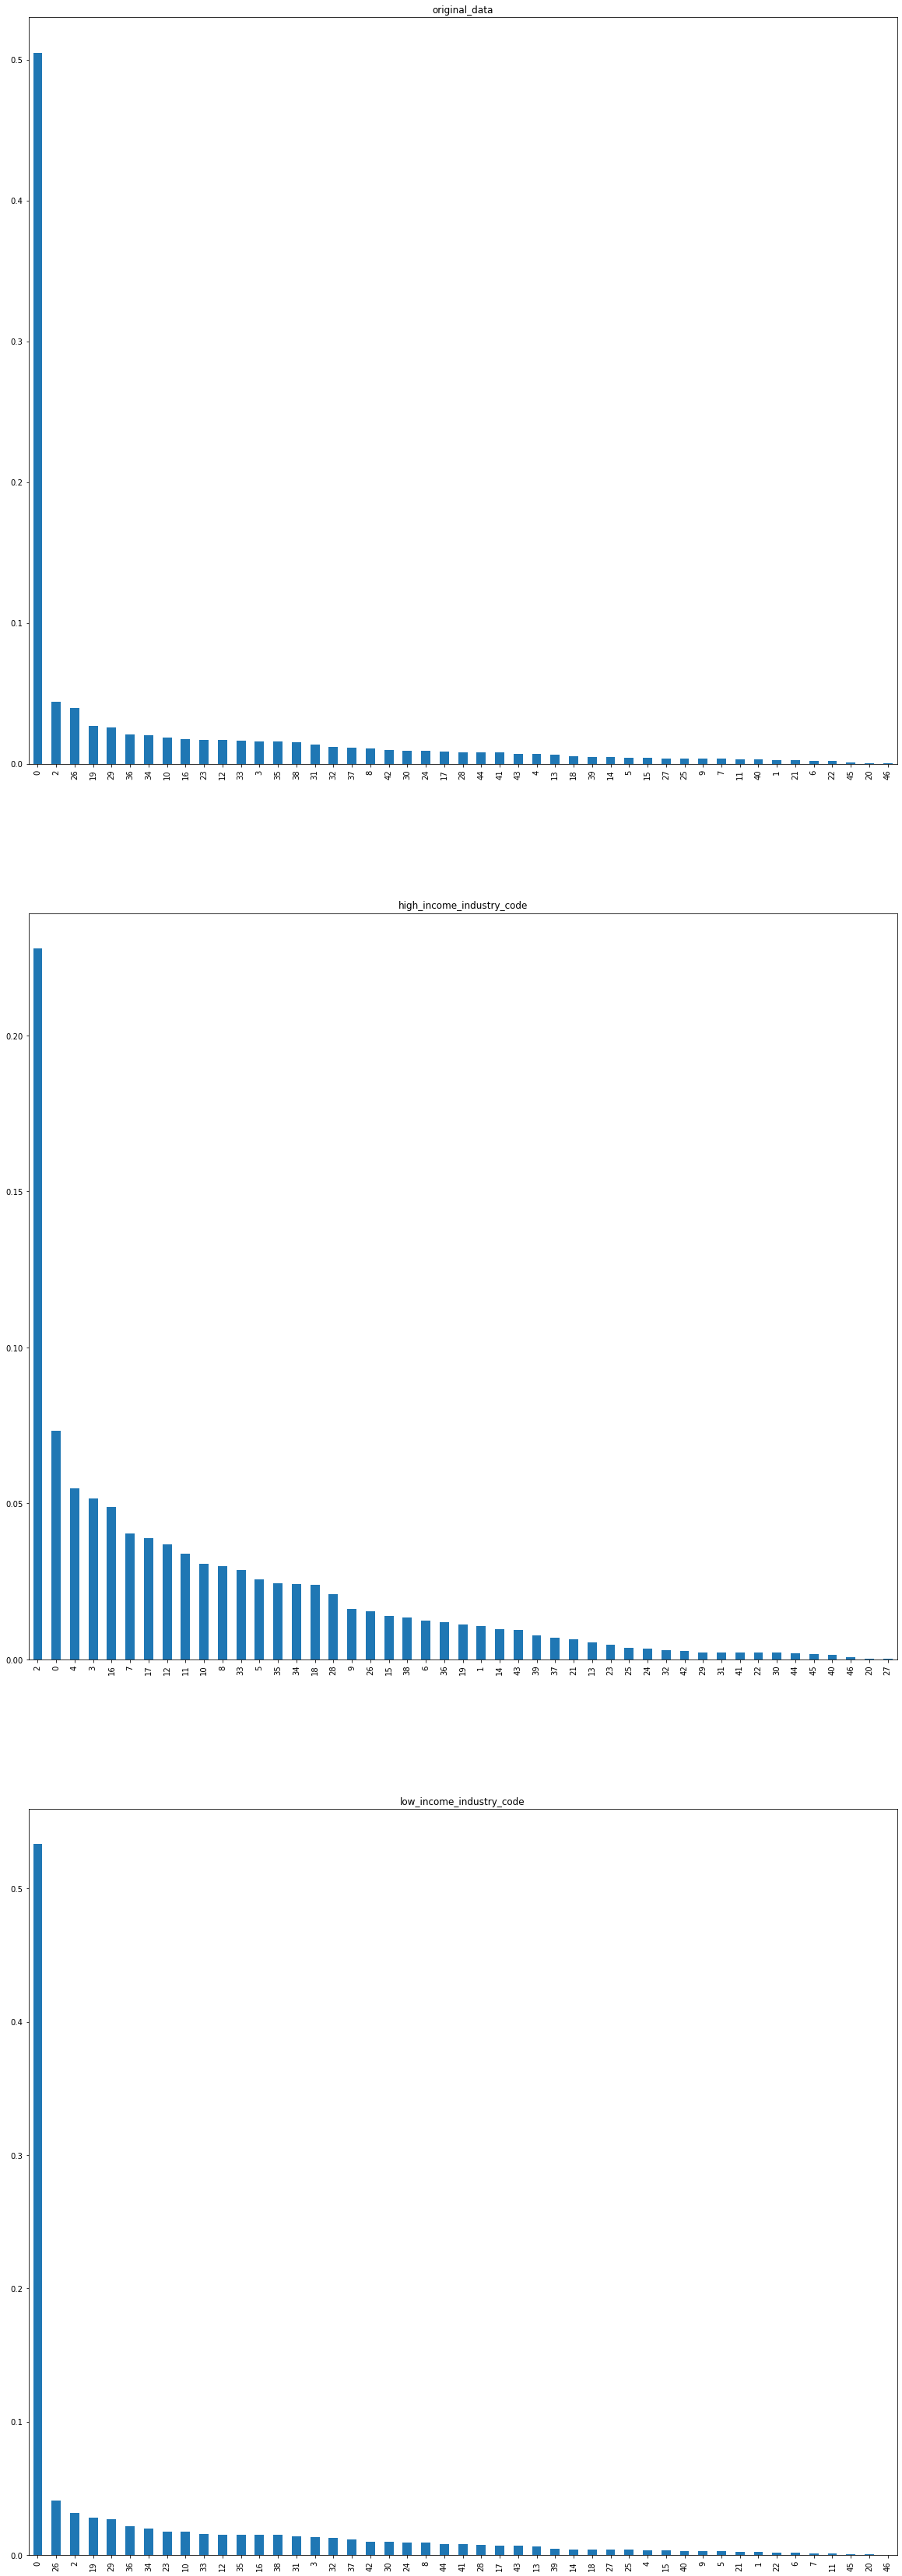

In [9]:
fig,ax=plt.subplots(3,1,figsize=(20,60))
cleaned_income_data['occupation_code'].value_counts(normalize=True).plot.bar(title='original_data',ax=ax[0])
high_income_df['occupation_code'].value_counts(normalize=True).plot.bar(title='high_income_industry_code',ax=ax[1])
# plt.ylim(0,0.1)
low_income_df['occupation_code'].value_counts(normalize=True).plot.bar(title='low_income_industry_code',ax=ax[2])
# plt.ylim(0,0.08)
plt.show()

In [10]:
dict2={0:-1,1:0,2:1,3:1,4:0,5:0,6:0,7:1,8:1,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0,24:0,25:0,26:0,27:0,28:0,29:0,30:0,31:0,32:0,33:0,34:0,35:0,36:0,37:0,38:0,39:0,40:0,41:0,42:0,43:0,44:0,45:0,46:0,47:0,48:0,49:0,50:0,51:0,52:0}

In [11]:
cleaned_income_data_occupation=cleaned_income_data.replace({"occupation_code": dict2})

In [13]:
cleaned_income_data_occupation.occupation_code.value_counts().sum()

199523

In [33]:
cleaned_income_data_occupation=cleaned_income_data_occupation['occupation_code']

In [16]:
cleaned_income_data.drop(['Unnamed: 0'],inplace=True,axis=1)

In [17]:
cleaned_income_data.columns

Index(['age', 'industry_code', 'occupation_code', 'num_person_Worked_employer',
       'business_or_self_employed', 'veterans_benefits',
       'weeks_worked_in_year', 'year', 'income_level', 'wage_per_hour',
       'capital_gains', 'capital_losses', 'dividend_from_Stocks',
       'class_of_worker', 'education', 'enrolled_in_edu_inst_lastwk',
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'race', 'hispanic_origin', 'sex', 'member_of_labor_union',
       'reason_for_unemployment', 'full_parttime_employment_stat',
       'tax_filer_status', 'region_of_previous_residence',
       'state_of_previous_residence', 'd_household_family_stat',
       'd_household_summary', 'migration_msa', 'migration_reg',
       'migration_within_reg', 'live_1_year_ago', 'migration_sunbelt',
       'family_members_under_18', 'country_father', 'country_mother',
       'country_self', 'citizenship', 'fill_questionnaire_veteran_admin'],
      dtype='object')

In [40]:
list_count=['num_person_Worked_employer',
       'business_or_self_employed', 'veterans_benefits',
       'weeks_worked_in_year', 'year', 'income_level', 'wage_per_hour',
       'capital_gains', 'capital_losses', 'dividend_from_Stocks',
       'class_of_worker', 'education', 'enrolled_in_edu_inst_lastwk',
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'race', 'hispanic_origin', 'sex', 'member_of_labor_union',
       'reason_for_unemployment', 'full_parttime_employment_stat',
       'tax_filer_status', 'region_of_previous_residence',
       'state_of_previous_residence', 'd_household_family_stat',
       'd_household_summary', 'migration_msa', 'migration_reg',
       'migration_within_reg', 'live_1_year_ago', 'migration_sunbelt',
       'family_members_under_18', 'country_father', 'country_mother',
       'country_self', 'citizenship', 'fill_questionnaire_veteran_admin']

In [38]:
cleaned_income_data.num_person_Worked_employer.nunique()

7

In [51]:
list_less_than_9=[]
def count_values(list_count):
    for i in list_count:
        x=cleaned_income_data[i].nunique()
        if x <9:
            list_less_than_9.append(i)
#             print(i)
        
count_values(list_count)        
            

In [52]:
list_less_than_9

['num_person_Worked_employer',
 'business_or_self_employed',
 'veterans_benefits',
 'year',
 'income_level',
 'enrolled_in_edu_inst_lastwk',
 'marital_status',
 'race',
 'sex',
 'member_of_labor_union',
 'reason_for_unemployment',
 'full_parttime_employment_stat',
 'tax_filer_status',
 'region_of_previous_residence',
 'd_household_summary',
 'migration_reg',
 'live_1_year_ago',
 'migration_sunbelt',
 'family_members_under_18',
 'citizenship',
 'fill_questionnaire_veteran_admin']

In [97]:
df_list_less_than_9=cleaned_income_data[['enrolled_in_edu_inst_lastwk',
 'marital_status','hispanic_origin','migration_within_reg','migration_msa','class_of_worker',
 'race',
 'sex',
 'member_of_labor_union',
 'reason_for_unemployment',
 'full_parttime_employment_stat',
 'tax_filer_status',
 'region_of_previous_residence',
 'd_household_summary',
 'migration_reg',
 'live_1_year_ago',
 'migration_sunbelt',
 'family_members_under_18',
 'citizenship',
 'fill_questionnaire_veteran_admin']]

In [98]:
df_list_less_than_9.shape

(199523, 20)

In [99]:
dummy_values_less_9=pd.get_dummies(df_list_less_than_9,drop_first=True)

In [100]:
dummy_values_less_9.shape

(199523, 97)

In [57]:
remain_values=set(list_count)-set(list_less_than_9)

In [60]:
remain_values

['weeks_worked_in_year',
 'migration_msa',
 'major_occupation_code',
 'country_mother',
 'capital_gains',
 'dividend_from_Stocks',
 'wage_per_hour',
 'state_of_previous_residence',
 'migration_within_reg',
 'country_self',
 'major_industry_code',
 'education',
 'hispanic_origin',
 'd_household_family_stat',
 'class_of_worker',
 'capital_losses',
 'country_father']

In [59]:
remain_values=list(remain_values)

In [62]:
num_values_select=cleaned_income_data.select_dtypes(include=['int64'])

In [64]:
num_values_select.columns

Index(['age', 'industry_code', 'occupation_code', 'num_person_Worked_employer',
       'business_or_self_employed', 'veterans_benefits',
       'weeks_worked_in_year', 'year', 'income_level', 'wage_per_hour',
       'capital_gains', 'capital_losses', 'dividend_from_Stocks'],
      dtype='object')

In [69]:
num_values=cleaned_income_data[['age','num_person_Worked_employer',
 'business_or_self_employed',
 'veterans_benefits','weeks_worked_in_year', 'year', 'income_level', 'wage_per_hour',
 'capital_gains', 'capital_losses', 'dividend_from_Stocks'
 ]]

In [71]:
num_values.shape

(199523, 11)

In [72]:
df_remaining_values=cleaned_income_data[['migration_msa', 'major_occupation_code', 'country_mother','state_of_previous_residence',
 'migration_within_reg',
 'country_self',
 'major_industry_code',
 'education',
 'hispanic_origin',
 'd_household_family_stat',
 'class_of_worker','country_father']]

In [73]:
df_remaining_values.shape

(199523, 12)

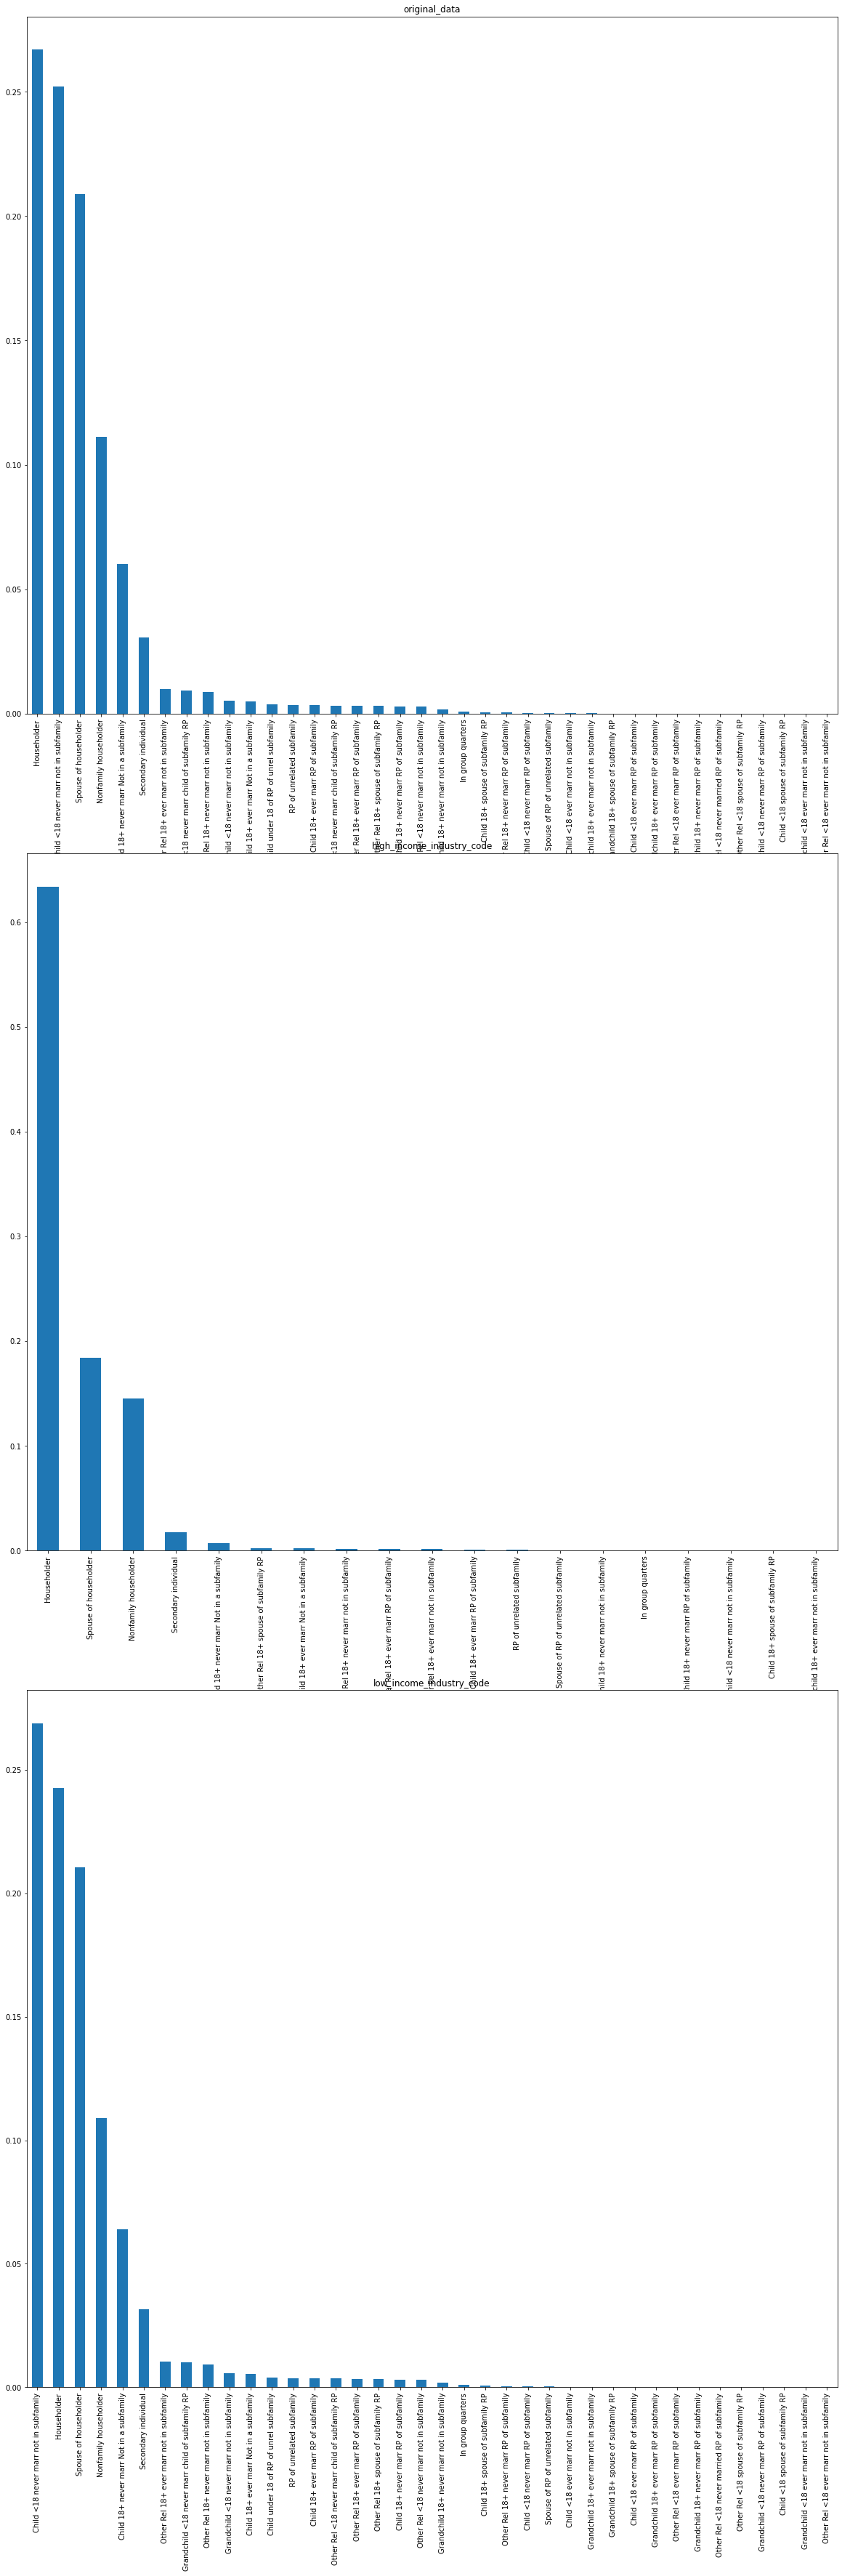

In [78]:
fig,ax=plt.subplots(3,1,figsize=(20,60))
cleaned_income_data['d_household_family_stat'].value_counts(normalize=True).plot.bar(title='original_data',ax=ax[0])
high_income_df['d_household_family_stat'].value_counts(normalize=True).plot.bar(title='high_income_industry_code',ax=ax[1])
# plt.ylim(0,0.1)
low_income_df['d_household_family_stat'].value_counts(normalize=True).plot.bar(title='low_income_industry_code',ax=ax[2])
# plt.ylim(0,0.08)
plt.show()

In [74]:
stats_dict={"Householder":1,"Spouse of householder":0,"Nonfamily householder":1,"Secondary individual":0,"Child 18+ never marr Not in a subfamily":-1,"Child <18 never marr not in subfamily":-1,"Other Rel 18+ ever marr not in subfamily":0,"Grandchild <18 never marr child of subfamily RP":0,"Other Rel 18+ never marr not in subfamily":0,"Grandchild <18 never marr not in subfamily":0,'Child 18+ ever marr Not in a subfamily':0,
       'Child 18+ never marr RP of subfamily':0,
       'Child 18+ spouse of subfamily RP':0,
       'Other Rel <18 never marr child of subfamily RP':0,
       'Child under 18 of RP of unrel subfamily':0,
       'Grandchild 18+ never marr not in subfamily':0,
       'Child 18+ ever marr RP of subfamily':0,
       'Other Rel 18+ ever marr RP of subfamily':0,
       'RP of unrelated subfamily':0,
       'Other Rel 18+ spouse of subfamily RP':0,
       'Other Rel <18 never marr not in subfamily':0,
       'Other Rel <18 spouse of subfamily RP':0, 'In group quarters':0,
       'Grandchild 18+ spouse of subfamily RP':0,
       'Other Rel 18+ never marr RP of subfamily':0,
       'Child <18 never marr RP of subfamily':0,
       'Child <18 ever marr not in subfamily':0,
       'Other Rel <18 ever marr RP of subfamily':0,
       'Grandchild 18+ ever marr not in subfamily':0,
       'Child <18 spouse of subfamily RP':0,
       'Spouse of RP of unrelated subfamily':0,
       'Other Rel <18 never married RP of subfamily':0,
       'Grandchild 18+ never marr RP of subfamily':0,
       'Grandchild 18+ ever marr RP of subfamily':0,
       'Child <18 ever marr RP of subfamily':0,
       'Other Rel <18 ever marr not in subfamily':0,
       'Grandchild <18 never marr RP of subfamily':0,
       'Grandchild <18 ever marr not in subfamily':0}

In [75]:
df_d_household_family_stat=cleaned_income_data.replace({'d_household_family_stat':stats_dict})

In [76]:
df_d_household_family_stat=df_d_household_family_stat['d_household_family_stat']

In [77]:
df_d_household_family_stat.head()

0    0
1    1
2   -1
3   -1
4   -1
Name: d_household_family_stat, dtype: int64

In [101]:
df_major_industry_code=cleaned_income_data.replace({'major_industry_code':{'Manufacturing-durable goods':1,'Finance insurance and real estate':1,'Other professional services':1,'Not in universe or children':-1,'Education':0,'Manufacturing-nondurable goods':0,'Public administration':0,'Retail trade':-1,'Business and repair services':0,'Medical except hospital':0,'Wholesale trade':0,'Construction':0,'Hospital services':0,'Transportation':0,'Communications':0,'Utilities and sanitary services':0,'Agriculture':0,'Mining':0,'Entertainment':0,'Personal services except private HH':0,'Social services':0,'Forestry and fisheries':0,'0':0}})

In [102]:
df_major_industry_code=df_major_industry_code['major_industry_code']

In [103]:
df_major_industry_code.head()

0    -1
1     0
2    -1
3    -1
4    -1
Name: major_industry_code, dtype: object

In [104]:
df_major_occupation_code=cleaned_income_data.replace({'major_occupation_code':{'Executive admin and managerial':1,'Professional specialty':1,'Sales':1,'Precision production craft & repair':0,'Not in universe':-1,'Adm support including clerical':-1,'Technicians and related support':0,'Transportation and material moving':0,'Protective services':0,'Machine operators assmblrs & inspctr':0,'Farming forestry and fishing':0,'Other service':-1,'Handlers equip cleaners etc':0,'Armed Forces':0,'Private household services':0}})

In [105]:
df_major_occupation_code=df_major_occupation_code['major_occupation_code']

In [106]:
df_major_occupation_code.head()

0    -1
1     0
2    -1
3    -1
4    -1
Name: major_occupation_code, dtype: object

In [107]:
df_education=cleaned_income_data.replace({'education':{'Bachelors degree(BA AB BS)':1,'Children':-1,'Masters degree(MA MS MEng MEd MSW MBA)':1,'High school graduate':-1,'Some college but no degree':0,'Prof school degree (MD DDS DVM LLB JD)':1,'Doctorate degree(PhD EdD)':1,'Associates degree-academic program':0,'Associates degree-occup /vocational':0,'7th and 8th grade':-1,'11th grade':-1,'10th grade':-1,'9th grade':1,'12th grade no diploma':0,'5th or 6th grade':-1,'1st 2nd 3rd or 4th grade':-1,'Less than 1st grade':0}})

In [108]:
df_education=df_education['education']

In [109]:
df_education.head()

0   -1
1    0
2   -1
3   -1
4   -1
Name: education, dtype: int64

In [96]:
cleaned_income_data.class_of_worker.nunique()

9

In [36]:
cleaned_income_data_industry
cleaned_income_data_occupation
dummy_values_less_9
num_values
df_d_household_family_stat
df_major_industry_code
df_major_occupation_code
df_education

In [23]:
cleaned_income_data_industry.head()

0    0
1    4
2    0
3    0
4    0
Name: industry_code, dtype: object

In [111]:
featured_engg_income_data=pd.concat([cleaned_income_data_industry,cleaned_income_data_occupation,dummy_values_less_9,num_values,df_d_household_family_stat,
df_major_industry_code,
df_major_occupation_code,
df_education],axis=1)

In [112]:
featured_engg_income_data.shape

(199523, 114)

In [113]:
featured_engg_income_data.to_excel(r'D:\featured_engg_income_data.xlsx')

#  Feature_Extraction

In [1]:
import pandas as pd
df_featured_engg_income_data = pd.read_excel(r'D:\featured_engg_income_data.xlsx')

In [7]:
#Feature slection using statistical model (chi2 test) for non-negative feature

# Note: we have negative values in our input features this ch2 test may not work

# Higher the chi2 value hight the predictoe and responce features deendent

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [13]:
X=df_featured_engg_income_data.drop(['income_level','Unnamed: 0'],axis=1)
y=df_featured_engg_income_data[['income_level']]

In [18]:
bestFeatures=SelectKBest(score_func=chi2,k=30)
fit=bestFeatures.fit(X,y)
dfScores=pd.DataFrame(fit.scores_,columns=scores)
dfColumns=pd.DataFrame(X.columns)
df_imp_features=pd.concat([dfScores,dfColumns],axis=1)

In [19]:
# Output:: X must be non-negative value

In [12]:
df_dtype=pd.DataFrame(df_featured_engg_income_data.dtypes,index=df_featured_engg_income_data.columns)

In [14]:
df_dtype.to_excel(r'D:\featured_engg_dtypes.xlsx')

#Using ensemble techniques for feature_selction

In [4]:
from sklearn.ensemble import ExtraTreesClassifier

In [14]:
model=ExtraTreesClassifier()
model.fit(X,y)
# print(model.feature_importances_)

<ipython-input-14-8bf3d70846db>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


ExtraTreesClassifier()

In [15]:
feature_imp=pd.Series(model.feature_importances_,index=X.columns)

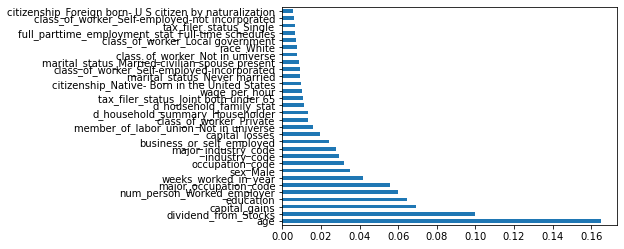

In [16]:
feature_imp.nlargest(30).plot(kind='barh')

In [18]:
feature_imp.nlargest(19).index

Index(['age', 'dividend_from_Stocks', 'capital_gains', 'education',
       'num_person_Worked_employer', 'major_occupation_code',
       'weeks_worked_in_year', 'sex_Male', 'occupation_code', 'industry_code',
       'major_industry_code', 'business_or_self_employed', 'capital_losses',
       'member_of_labor_union_Not in universe', 'class_of_worker_Private',
       'd_household_summary_Householder', 'd_household_family_stat',
       'tax_filer_status_Joint both under 65', 'wage_per_hour'],
      dtype='object')

In [19]:
imp_feature_income_data=['age', 'dividend_from_Stocks', 'capital_gains', 'education',
       'num_person_Worked_employer', 'major_occupation_code',
       'weeks_worked_in_year', 'sex_Male', 'occupation_code', 'industry_code',
       'major_industry_code', 'business_or_self_employed', 'capital_losses',
       'member_of_labor_union_Not in universe', 'class_of_worker_Private',
       'd_household_summary_Householder', 'd_household_family_stat',
       'tax_filer_status_Joint both under 65', 'wage_per_hour']

In [22]:
df_imp_feature_income_data=df_featured_engg_income_data[['age', 'dividend_from_Stocks', 'capital_gains', 'education',
       'num_person_Worked_employer', 'major_occupation_code',
       'weeks_worked_in_year', 'sex_Male', 'occupation_code', 'industry_code',
       'major_industry_code', 'business_or_self_employed', 'capital_losses',
       'member_of_labor_union_Not in universe', 'class_of_worker_Private',
       'd_household_summary_Householder', 'd_household_family_stat',
       'tax_filer_status_Joint both under 65', 'wage_per_hour','income_level']]

In [23]:
df_imp_feature_income_data.shape

(199523, 20)

# Model Train With Selected Important Features

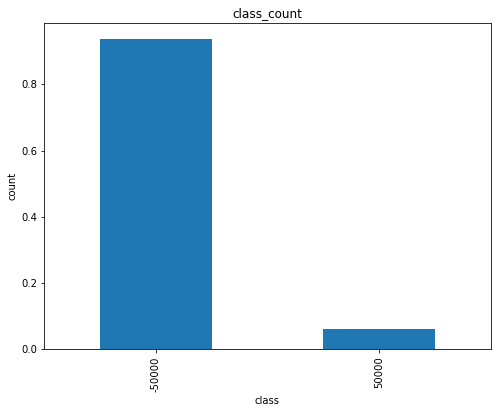

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
ploting_dependent_feature=pd.value_counts(df_imp_feature_income_data['income_level'],sort=True,normalize=True)
ploting_dependent_feature.plot(kind='bar')
plt.xlabel('class')
plt.ylabel('count')
plt.title('class_count')
plt.show()

In [54]:
high=df_featured_engg_income_data[df_featured_engg_income_data['income_level']==50000]
low=df_featured_engg_income_data[df_featured_engg_income_data['income_level']==-50000]

In [56]:
print("high_income shape{},low_income shape{}".format(high.shape,low.shape))

high_income shape(12382, 115),low_income shape(187141, 115)


In [60]:
X=df_imp_feature_income_data.drop(['income_level'],axis=1)
y=df_imp_feature_income_data['income_level']

In [61]:
print(X.shape,y.shape)

(199523, 19) (199523,)


#Using the under sampling

In [63]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [64]:
from imblearn.under_sampling import NearMiss

In [66]:
nm=NearMiss()

In [68]:
X_res,y_res=nm.fit_sample(X,y)

In [69]:
print(X_res.shape,y_res.shape)

(24764, 19) (24764,)


In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.25,random_state=42)
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score
acc_score=accuracy_score(y_test,y_pred)

In [77]:
acc_score

0.9121305120335972

#Using the over sampling

In [80]:
from imblearn.combine import SMOTETomek

In [84]:
over_sample_model=SMOTETomek(random_state=42)

In [86]:
X_over,y_over=over_sample_model.fit_sample(X,y)

In [87]:
print(X_over.shape,y_over.shape)

(372392, 19) (372392,)


In [88]:
X_train_over,X_test_over,y_train_over,y_test_over=train_test_split(X_over,y_over,test_size=0.3,random_state=42)


In [89]:
rfc.fit(X_train_over,y_train_over)
y_pred_over=rfc.predict(X_test_over)
acc_score=accuracy_score(y_test_over,y_pred_over)
acc_score

0.9497484738359083

#In over_sample technique 2

In [92]:
from imblearn.over_sampling import RandomOverSampler

In [96]:
model_2_over_sampling=RandomOverSampler()

In [98]:
X_over_2,y_over2=model_2_over_sampling.fit_sample(X,y)

In [99]:
X_train_over_2,X_test_over_2,y_train_over_2,y_test_over_2=train_test_split(X_over_2,y_over2,test_size=0.3,random_state=42)


In [101]:
rfc.fit(X_train_over_2,y_train_over_2)
y_pred_over_2=rfc.predict(X_test_over_2)
acc_score=accuracy_score(y_test_over_2,y_pred_over_2)
acc_score

0.9718038918822639

In [125]:
print(confusion_matrix(y_test_over_2,y_pred_over_2))

[[53568  2554]
 [  612 55551]]


#Adaboost and ensemble techniques also good for this dataset

#XGBoost and Gradient Boosting algorithm are good

In [102]:
X_train_xg,X_test_xg,y_train_xg,y_test_xg=train_test_split(X,y,test_size=0.3)

In [105]:
from xgboost import XGBClassifier

In [114]:
xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=5, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [115]:
xgb.fit(X_train_xg,y_train_xg)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [116]:
y_pred_xgb=xgb.predict(X_test_xg)

In [123]:
from sklearn.metrics import roc_auc_score, classification_report,confusion_matrix

In [121]:
roc_auc_score(y_test_xg,y_pred_xgb)

0.6966168645785933

In [124]:
print(confusion_matrix(y_test_xg,y_pred_xgb))

[[55596   608]
 [ 2177  1476]]
